# MATH7002 Advanced Statistical methods
## Worksheet 5

The Old Faithful data is available in base `R` as `faithful`. It contains waiting times and eruption times. The Turtle swimming directions are in `Turtles.csv`. The three mixture data is in `ThreeMix.csv`.

1. Using the code in lectures, try and use `mle` to fit a two component Normal mixture to the Turtles direction data.

In [1]:
turtles = read.csv("Turtles.csv")

In [3]:
negloglik = function(mu1, s1, mu2, s2, lambda)
    -sum(log(lambda * dnorm(x, mu1, s1) + (1-lambda) * dnorm(x, mu2, s2)))

In [5]:
x = turtles$Direction

In [8]:
# Loading the stats4 package for using mle
require(stats4)

Loading required package: stats4



In [9]:
#Here we want to use certain initialiazation
fit = mle(negloglik, start = list(mu1 = min(x), mu2= max(x), s1 = sd(x), s2 = sd(x), lambda = 0.5)) 

Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning message in log(lambda * dnorm(x, mu1, s1) + (1 - lambda) * dnorm(x, mu2, :
“NaNs produced”
Warning me

In [15]:
summary(fit)

Maximum likelihood estimation

Call:
mle(minuslogl = negloglik, start = list(mu1 = min(x), mu2 = max(x), 
    s1 = sd(x), s2 = sd(x), lambda = 0.5))

Coefficients:
          Estimate  Std. Error
mu1     63.2215471  4.62824250
s1      29.8804037  3.81760767
mu2    238.4604365 18.24206978
s2      59.1779512 13.76002703
lambda   0.7428678  0.05725351

-2 log L: 837.1479 


2. Using the manual EM code fit a two-component Normal mixture to the Turtle data.


In [23]:
twoFixEM = function(x){
    # Random Guess
    lambda = 0.5
    mu = range(x)
    # rep(): generate duplicate values
    sigma = rep(sd(x), 2)
    # Iteration
    repeat{
        # Firstly, we draw two curves of our PDF functions
        curve(lambda * dnorm(x, mu[1], sigma[1]), from = 0, to = 360, col = 'red')
        curve((1-lambda) * dnorm(x, mu[2], sigma[2]), from = 0, to =360, col = 'blue', add = TRUE)
        Sys.sleep(1)
        # oldp is the list of old parameters 
        oldp = c(lambda, mu, sigma)
        # Here we gonna to caculate the latent label for each data point 
        gamma = lambda * dnorm(x, mu[1], sigma[1])
        gamma = gamma/(gamma + (1-lambda)*dnorm(x, mu[2], sigma[2]))
        # Here we update the parameters for mu1, sigma1, mu2, sigma2
        # Using the formualation on slides
        mu[1] = sum(gamma * x)/sum(gamma)
        mu[2] = sum((1-gamma)*x)/sum(1-gamma)
        sigma[1] = sqrt(sum(gamma*(x-mu[1])^2)/sum(gamma))
        sigma[2] = sqrt(sum(1-gamma)*(x-mu[2])^2/sum(1-gamma))
        # Length(x) is n, which refers to the size of our dataset
        lambda = sum(gamma)/length(x)
        # Check convergence
        update = sum(abs(c(lambda,mu,sigma) - oldp))
        if (update<0.001)
            break
    }
    return(list(lambda=lambda, mu =mu, sigma = sigma))
}

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


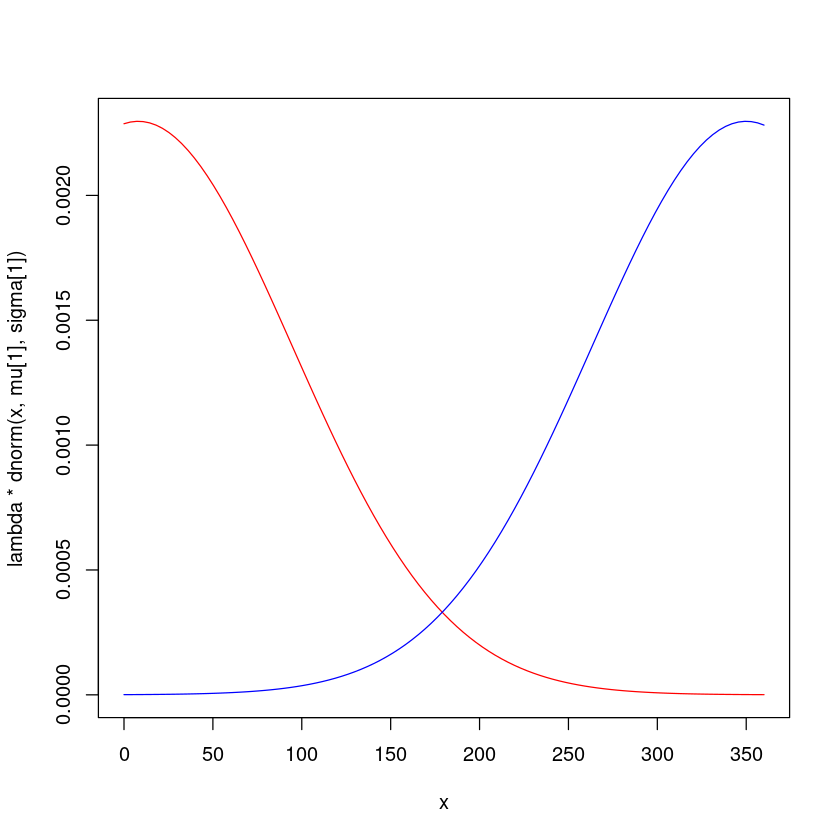

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


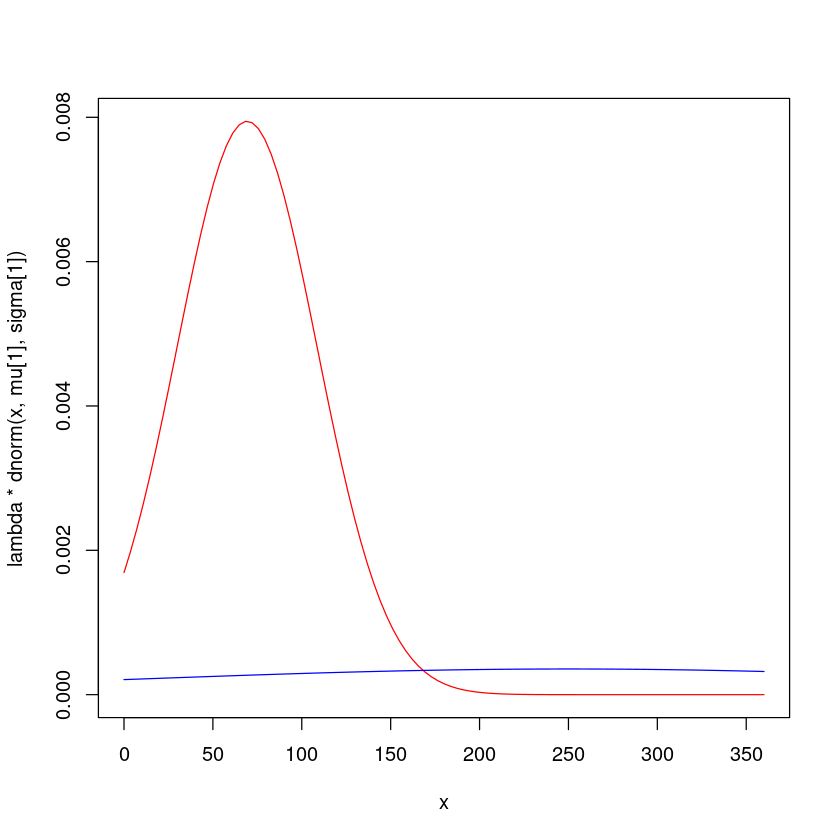

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


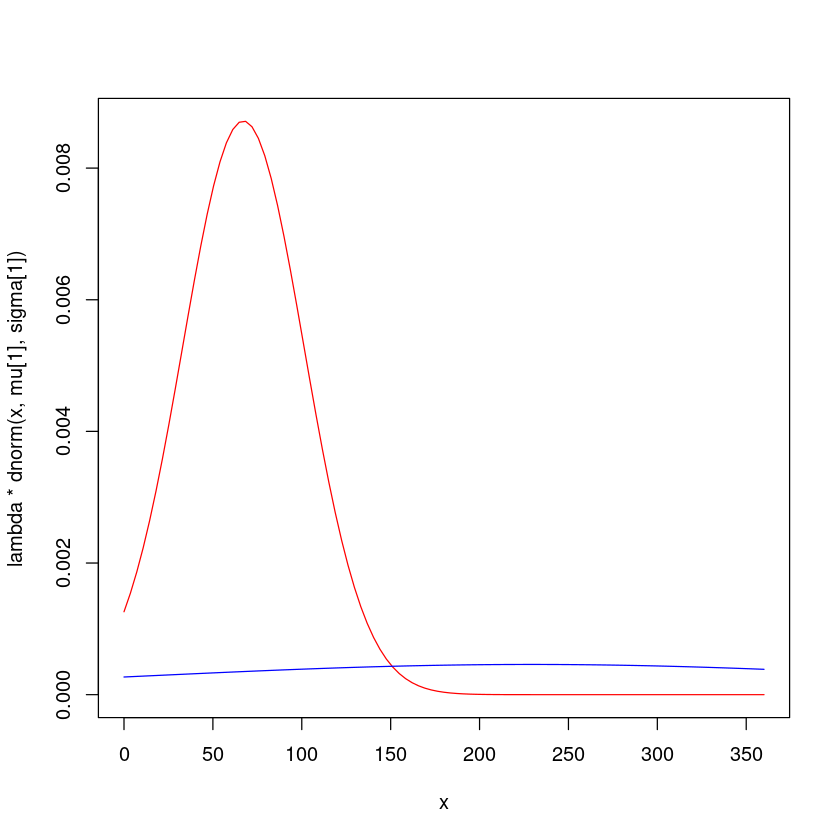

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


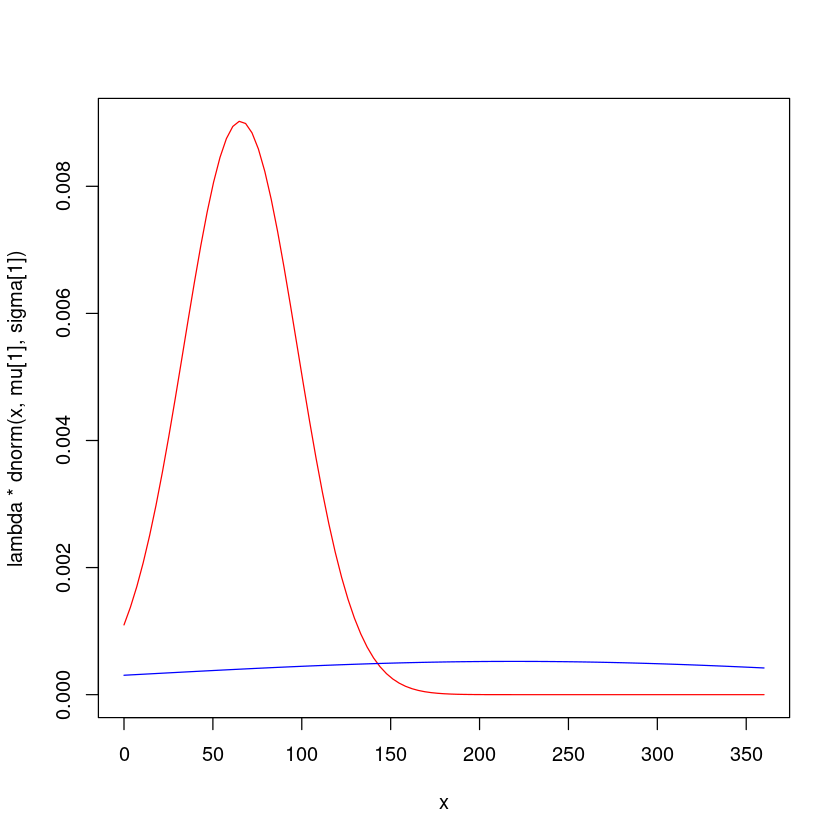

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


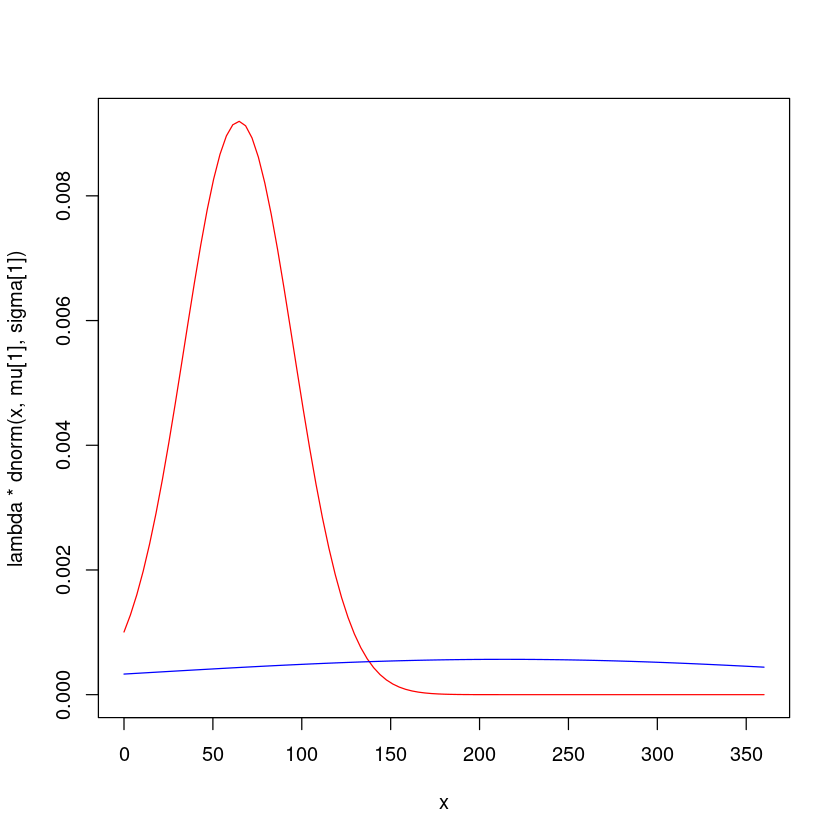

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


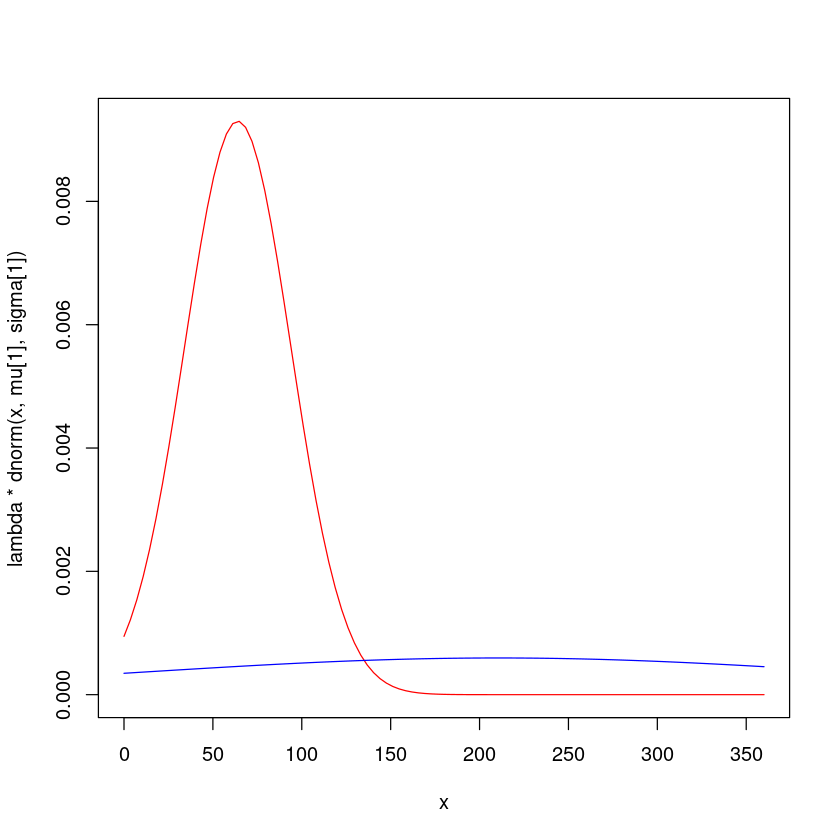

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


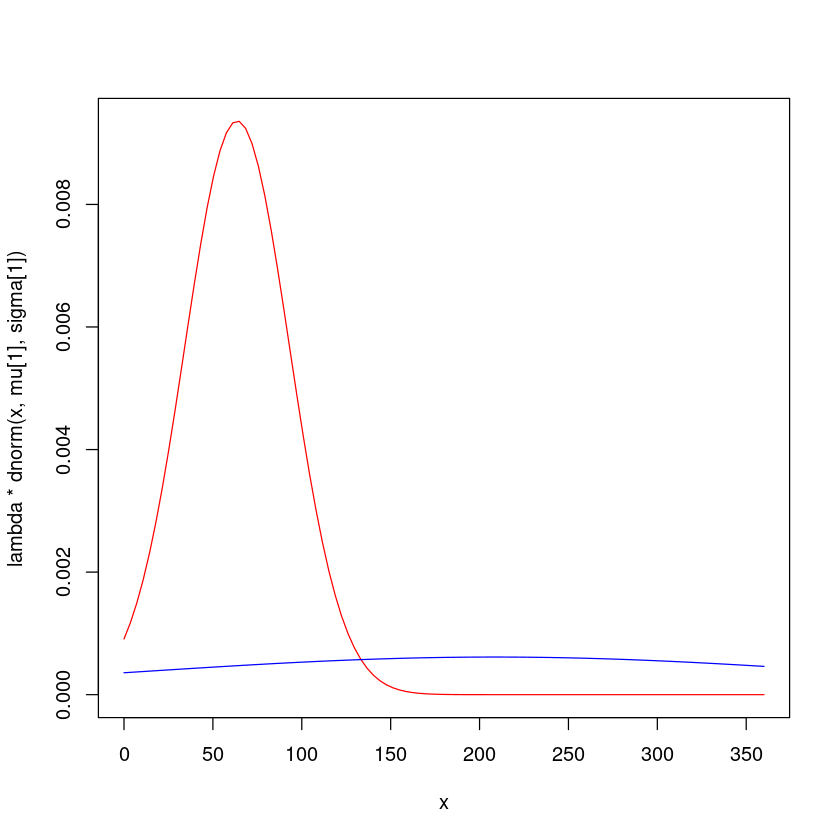

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


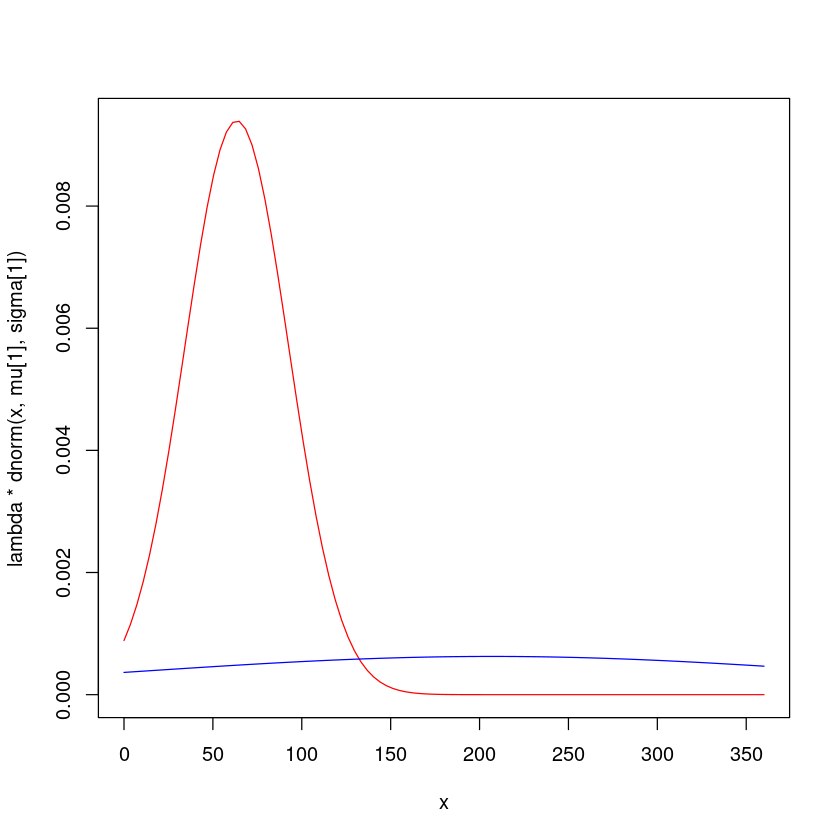

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


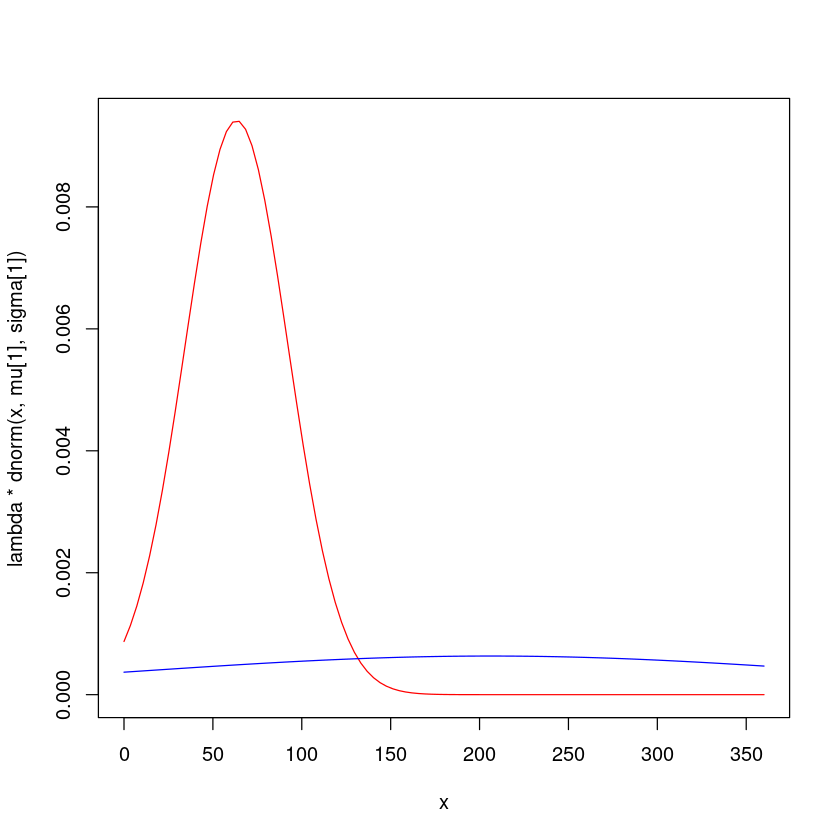

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


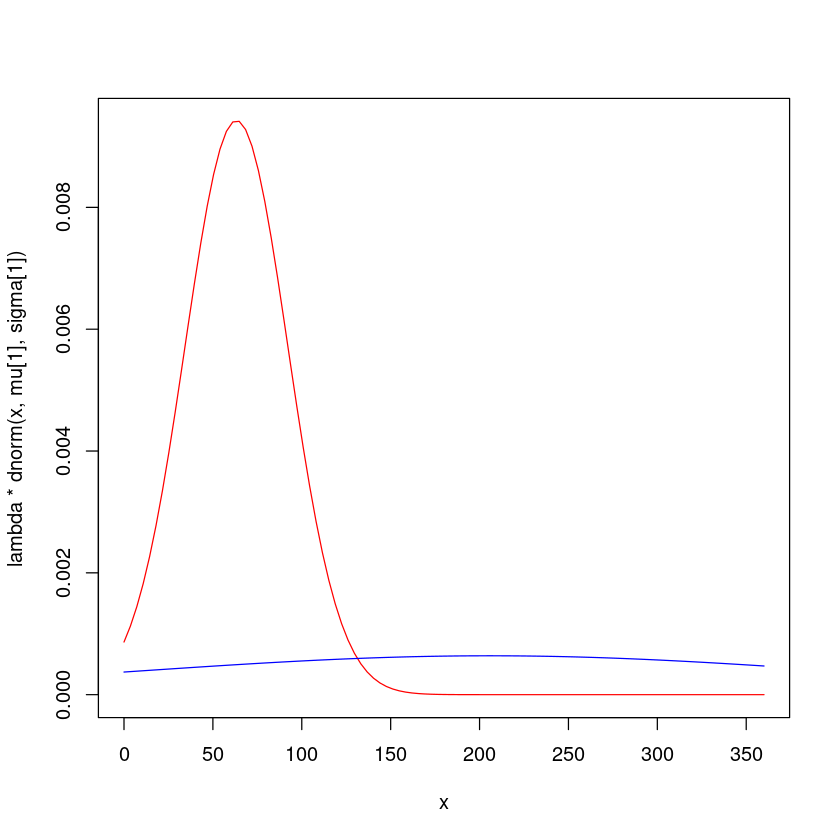

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


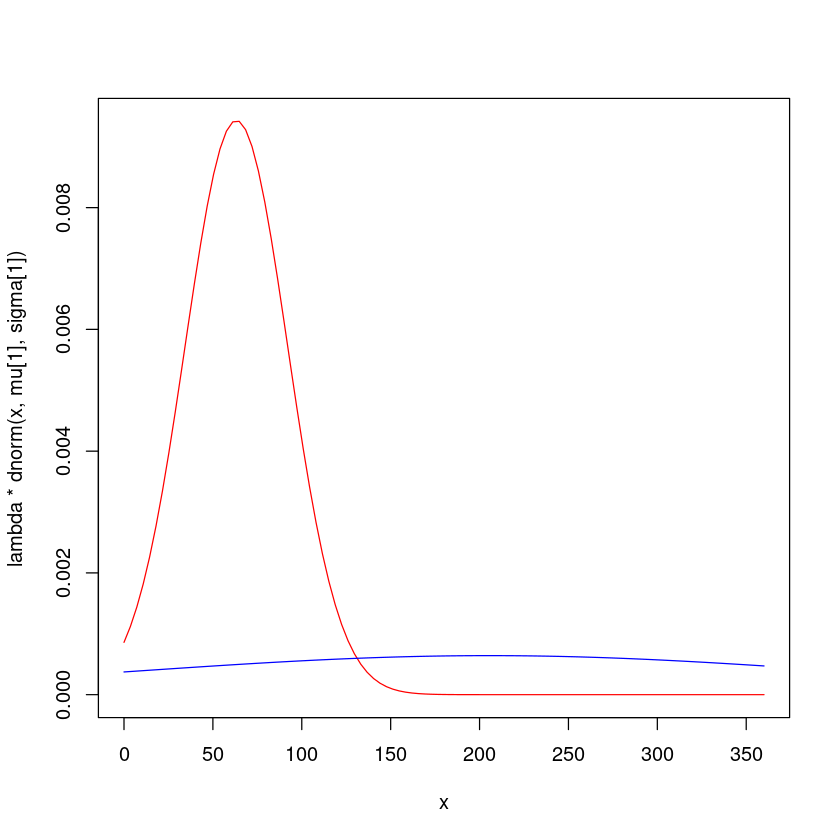

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


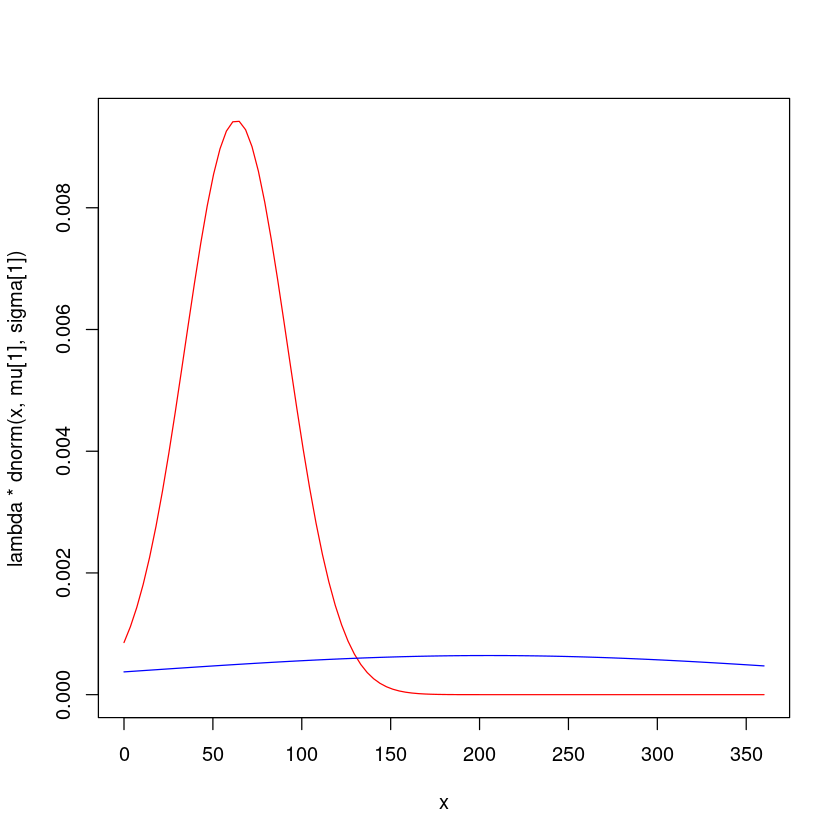

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


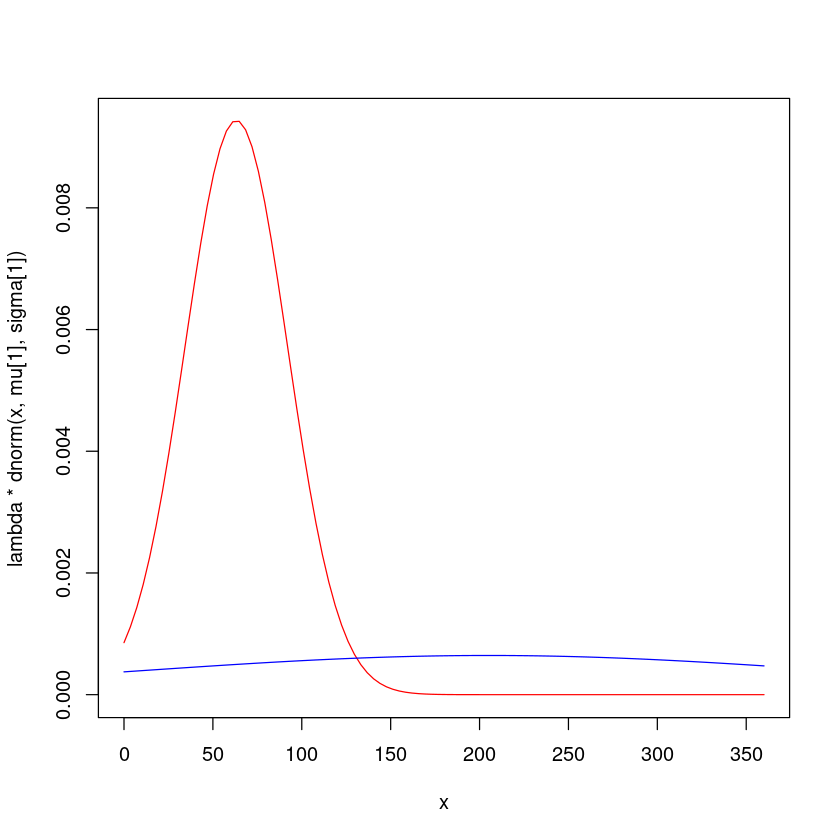

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


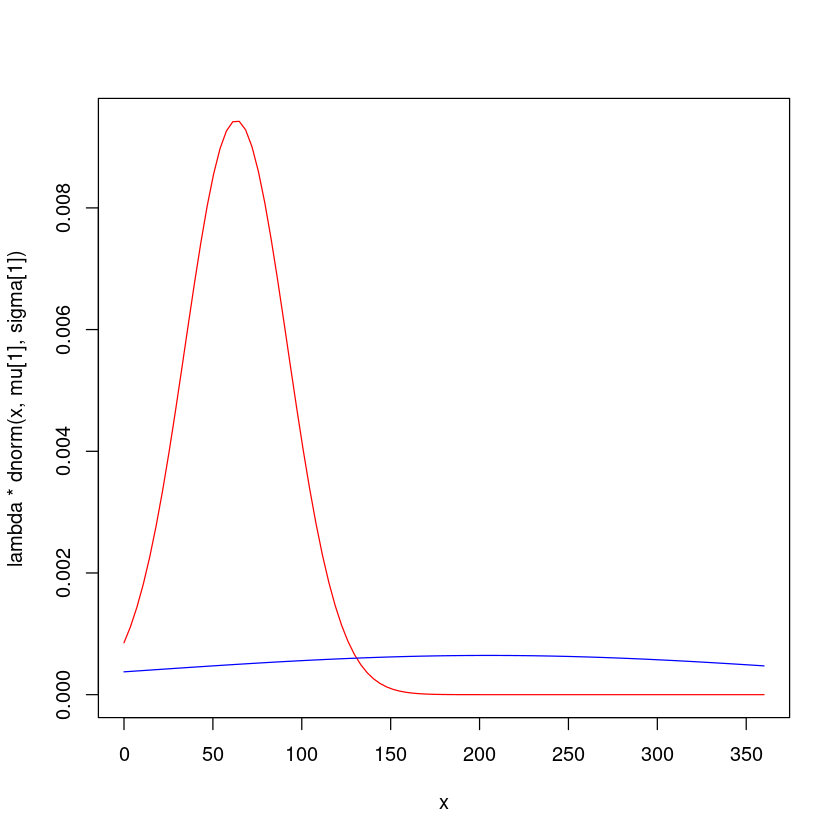

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


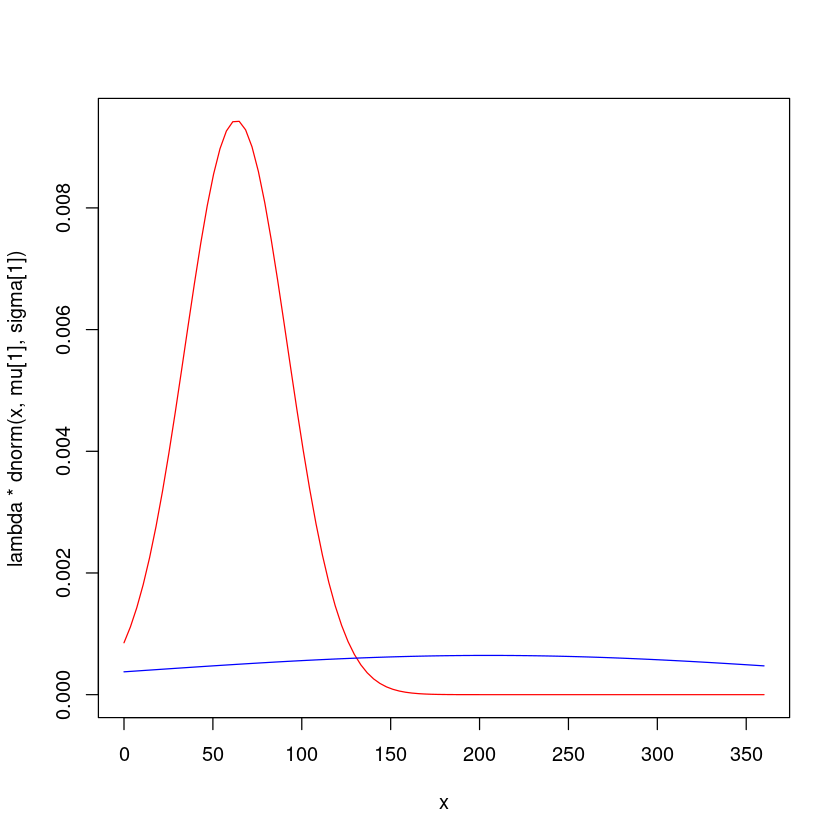

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


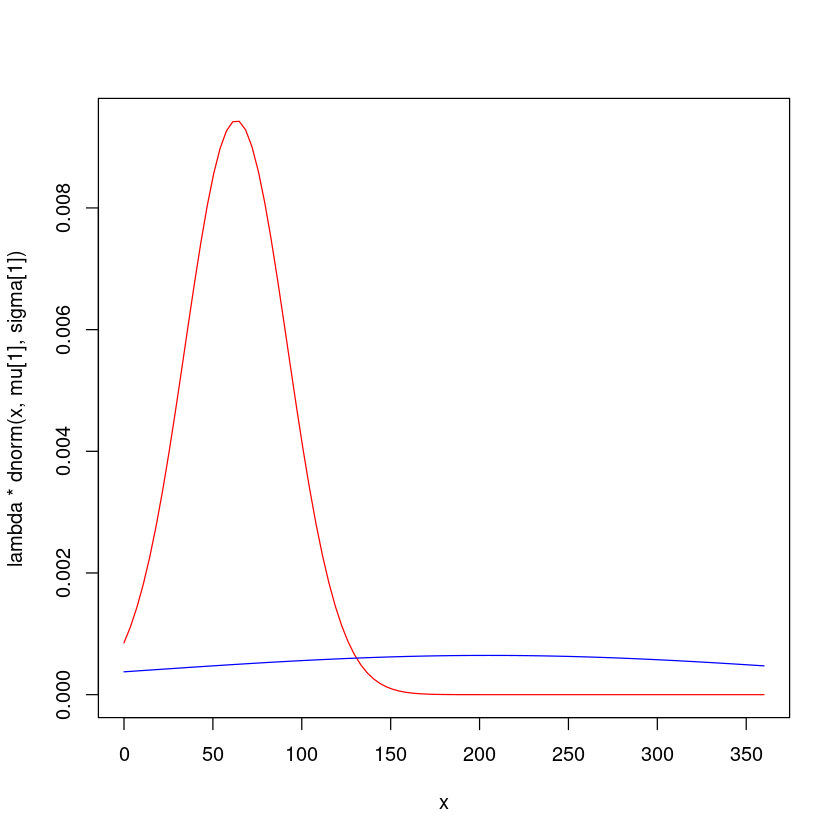

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


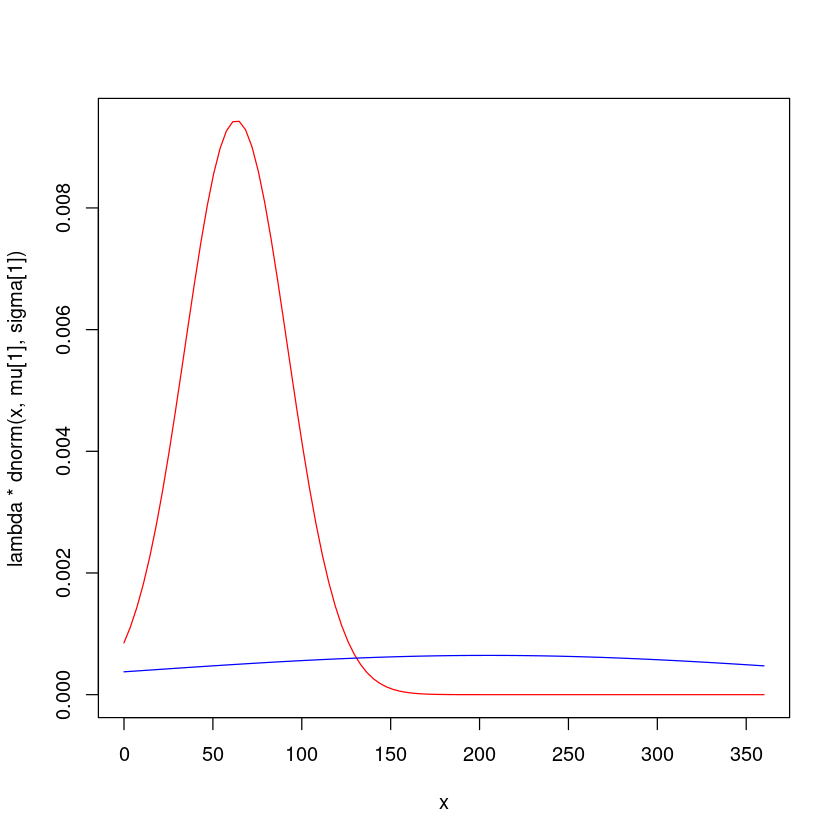

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


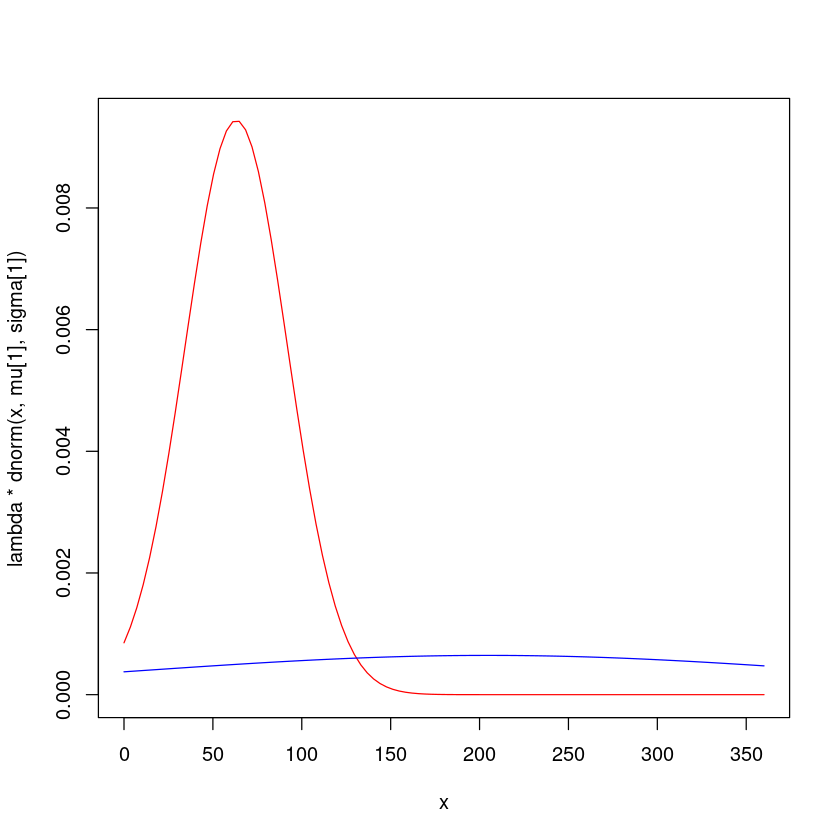

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


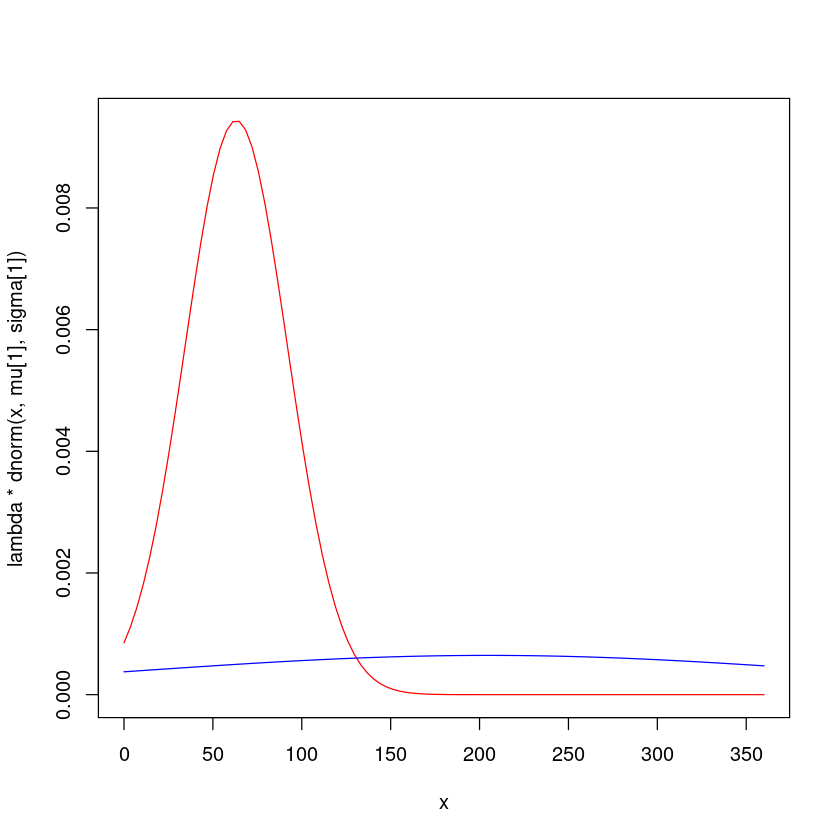

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


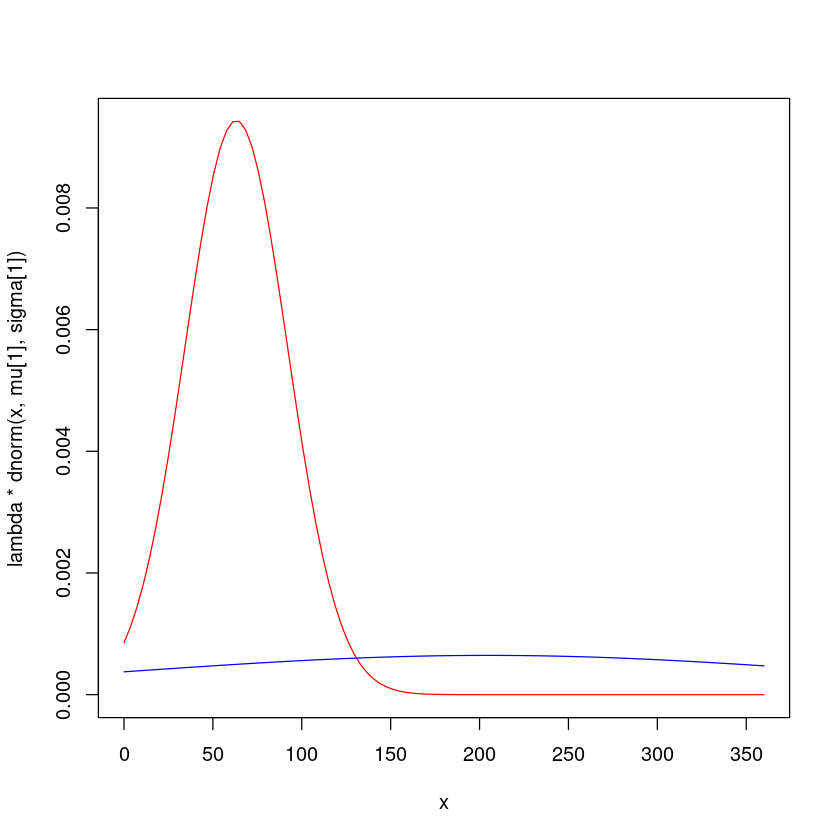

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


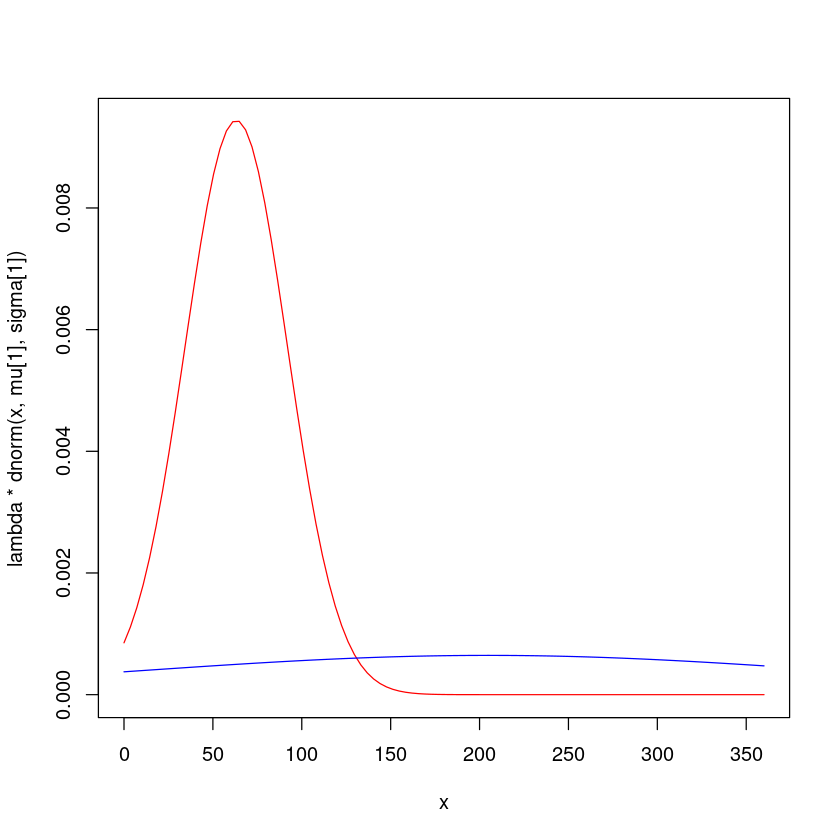

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


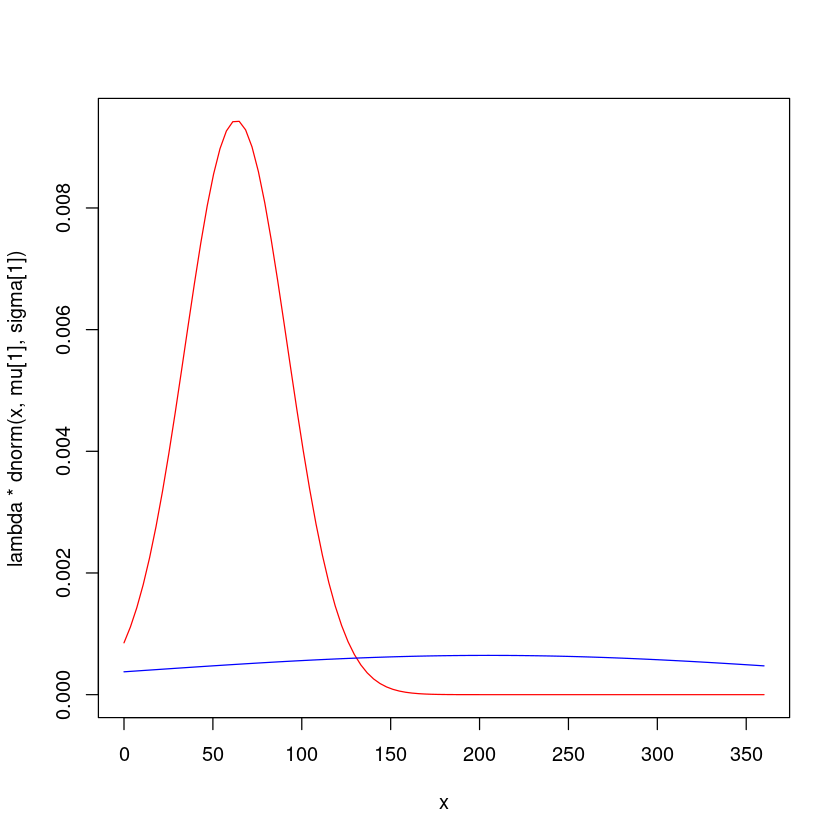

Warning message in sigma[2] <- sqrt(sum(1 - gamma) * (x - mu[2])^2/sum(1 - gamma)):
“number of items to replace is not a multiple of replacement length”


$lambda
[1] 0.6813354

$mu
[1]  63.15255 204.92042

$sigma
[1]  28.79633 196.92042

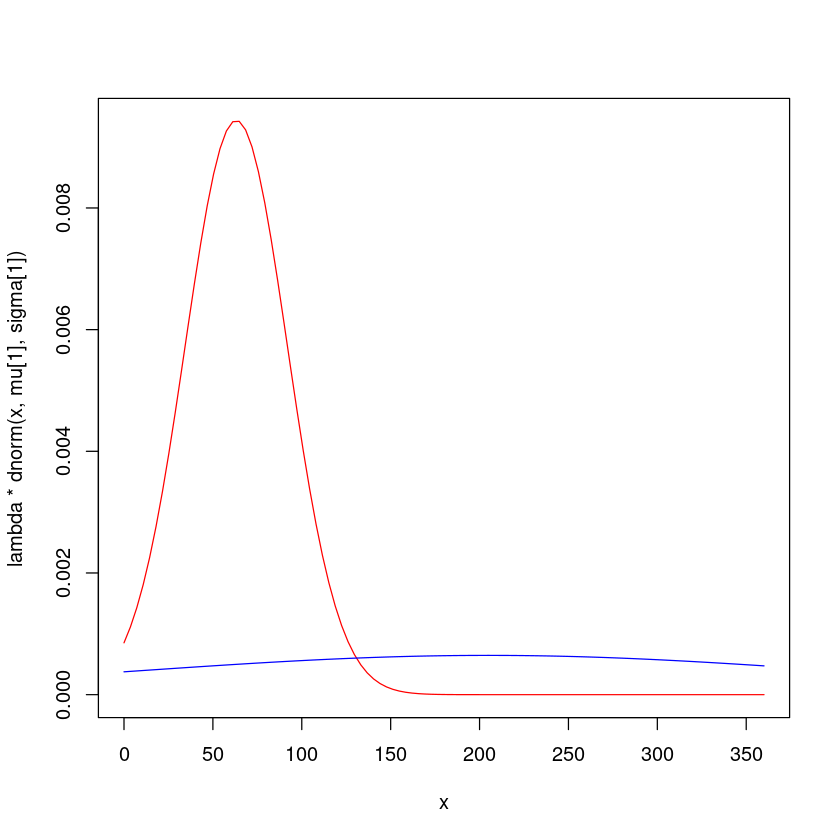

In [24]:
twoFixEM(turtles$Direction)

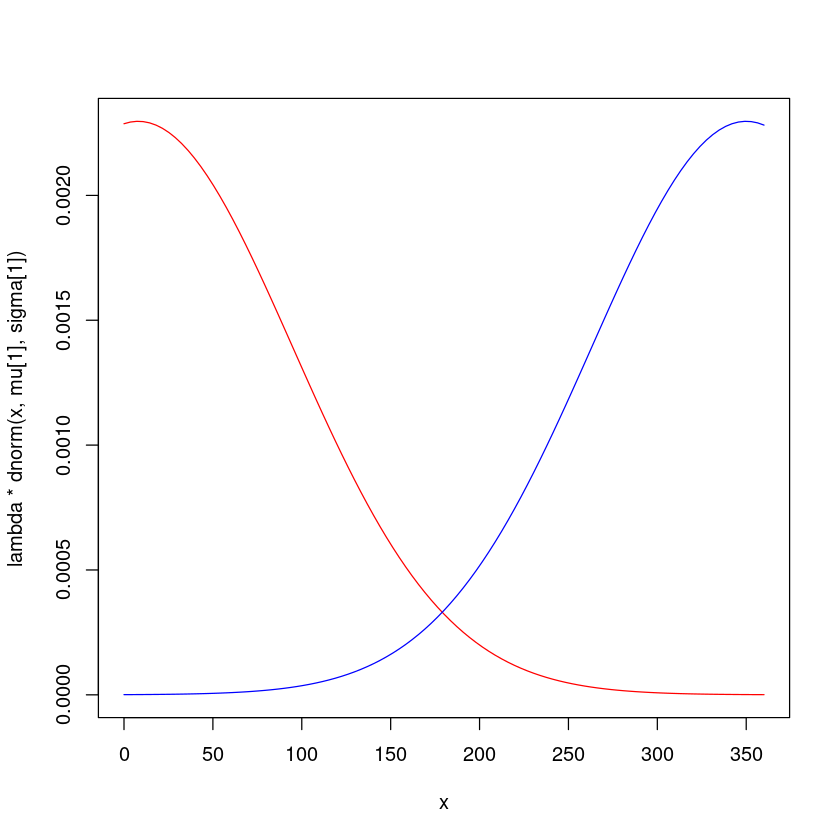

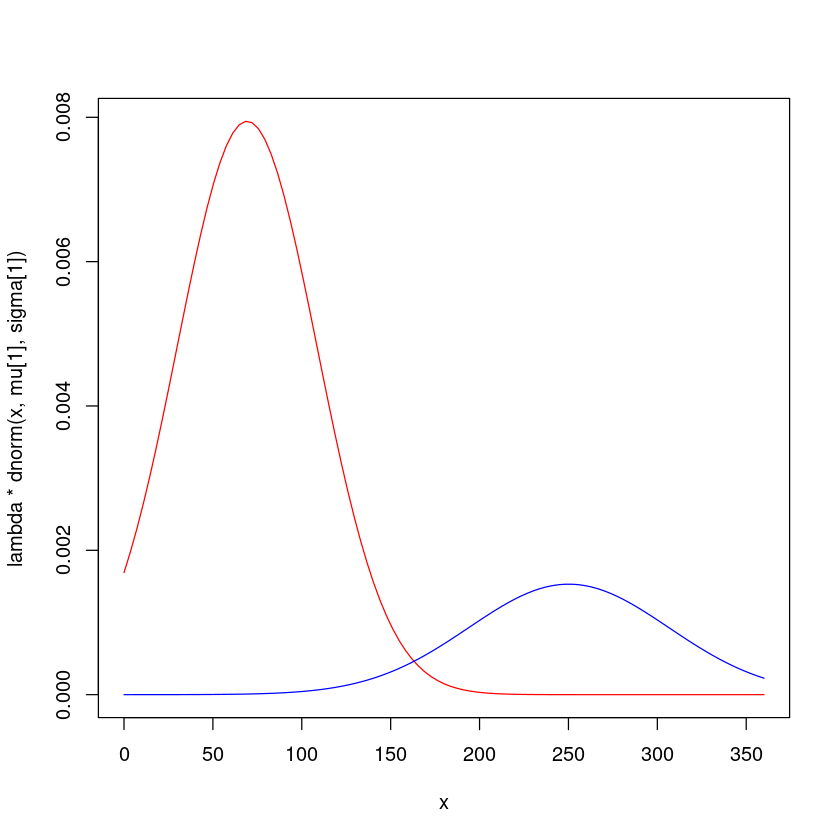

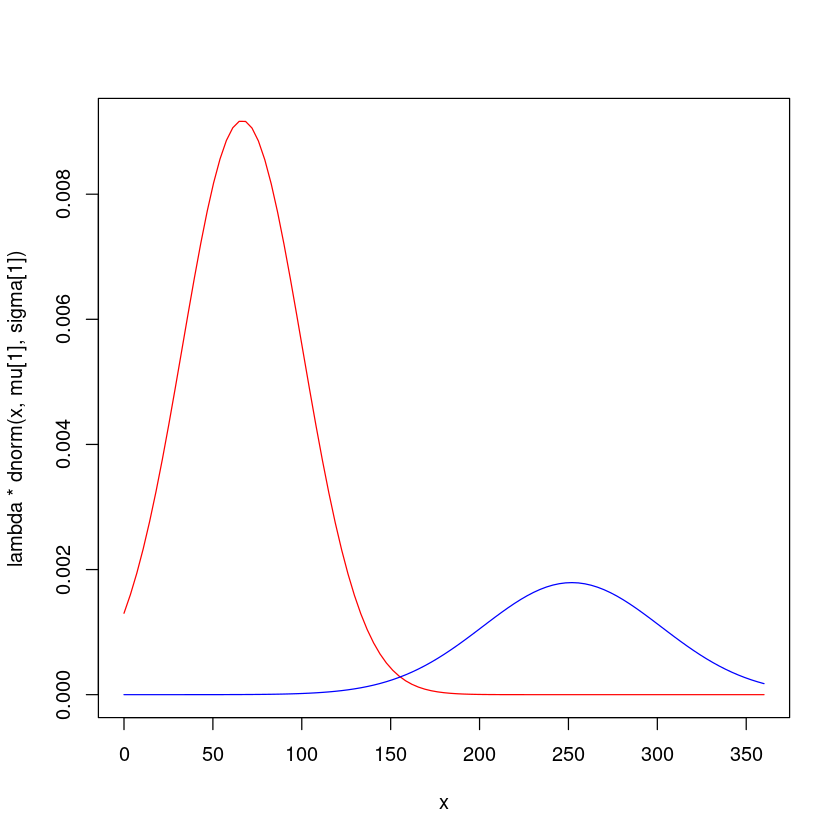

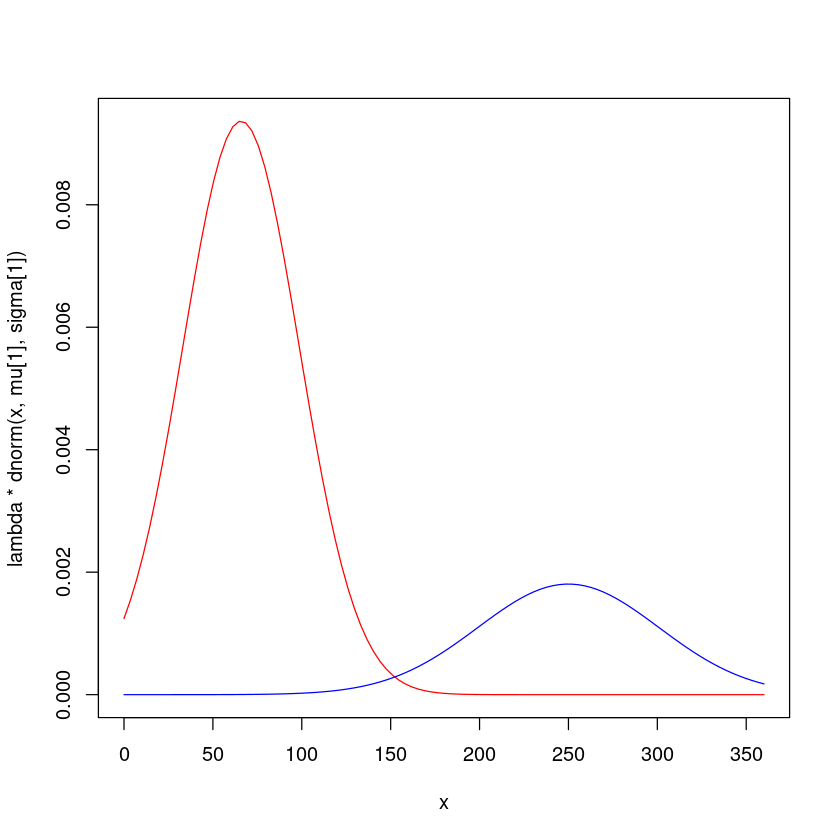

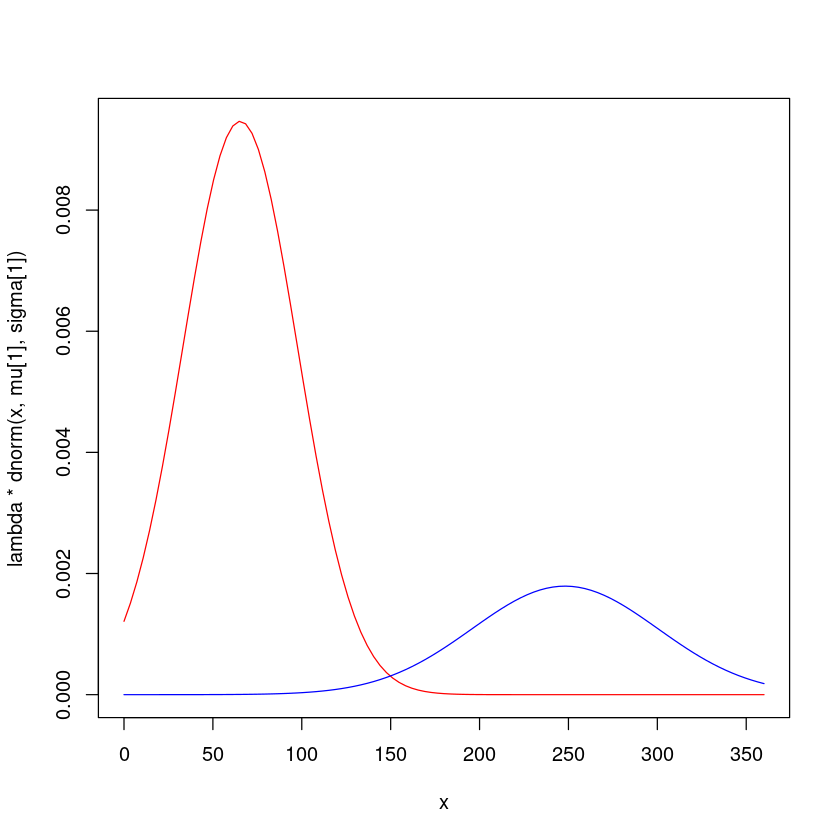

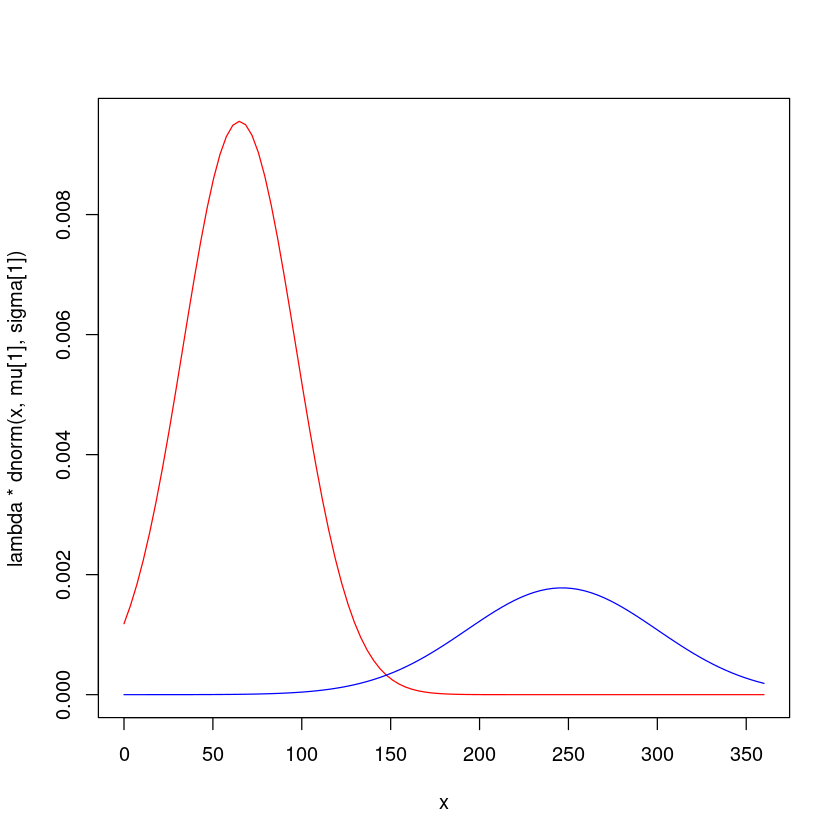

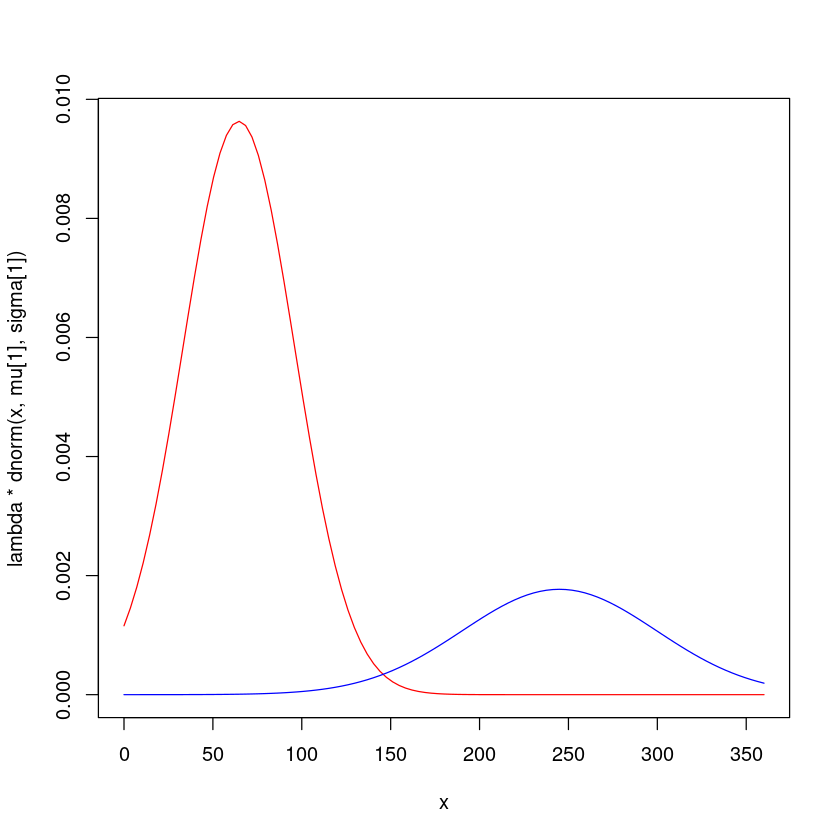

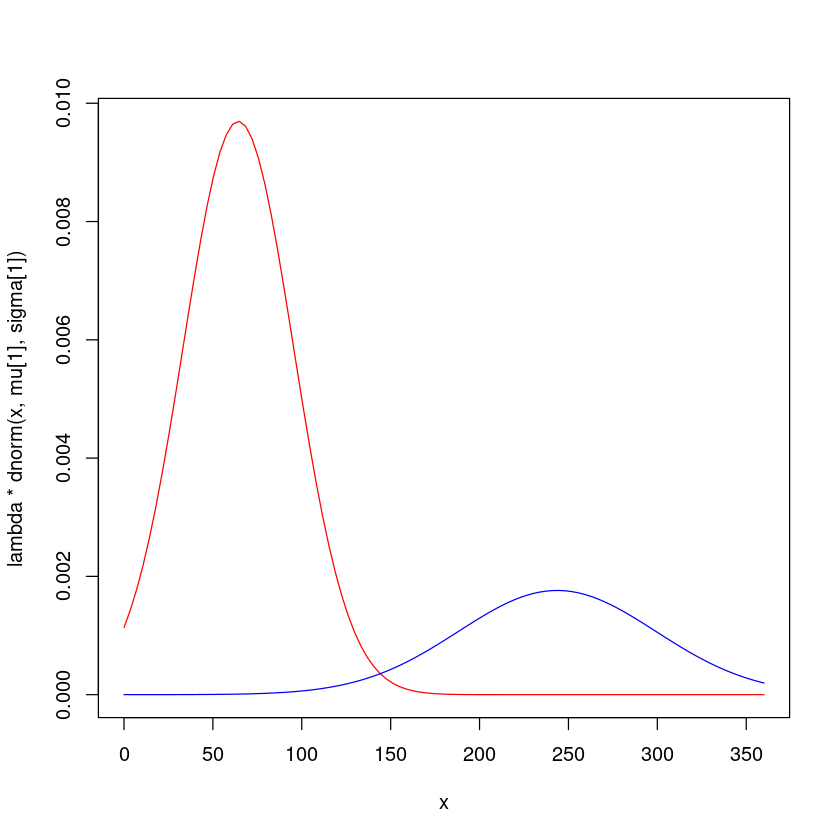

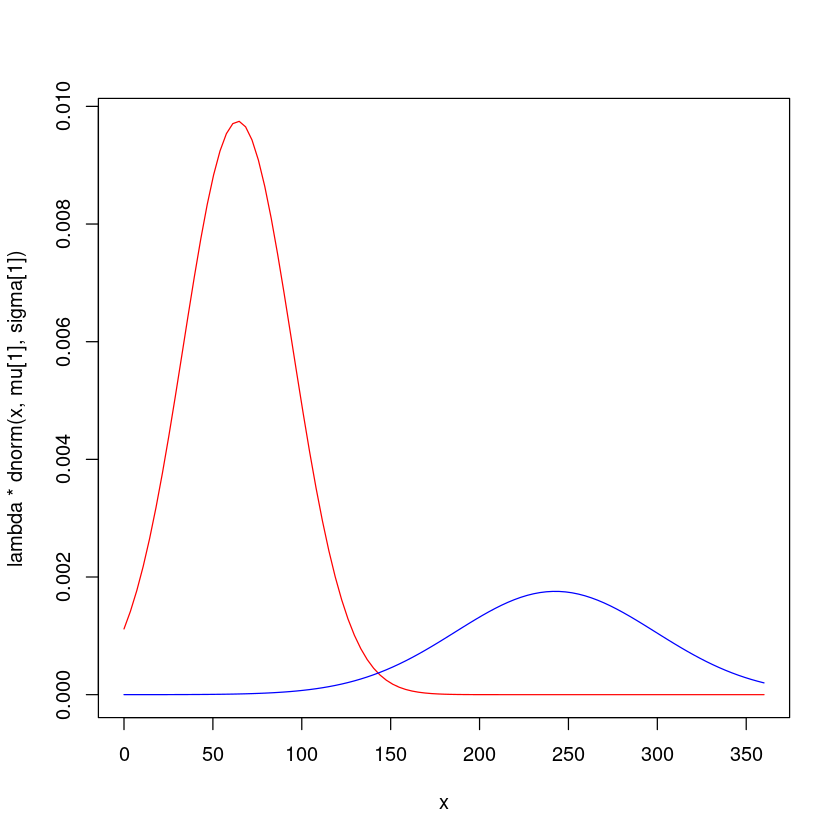

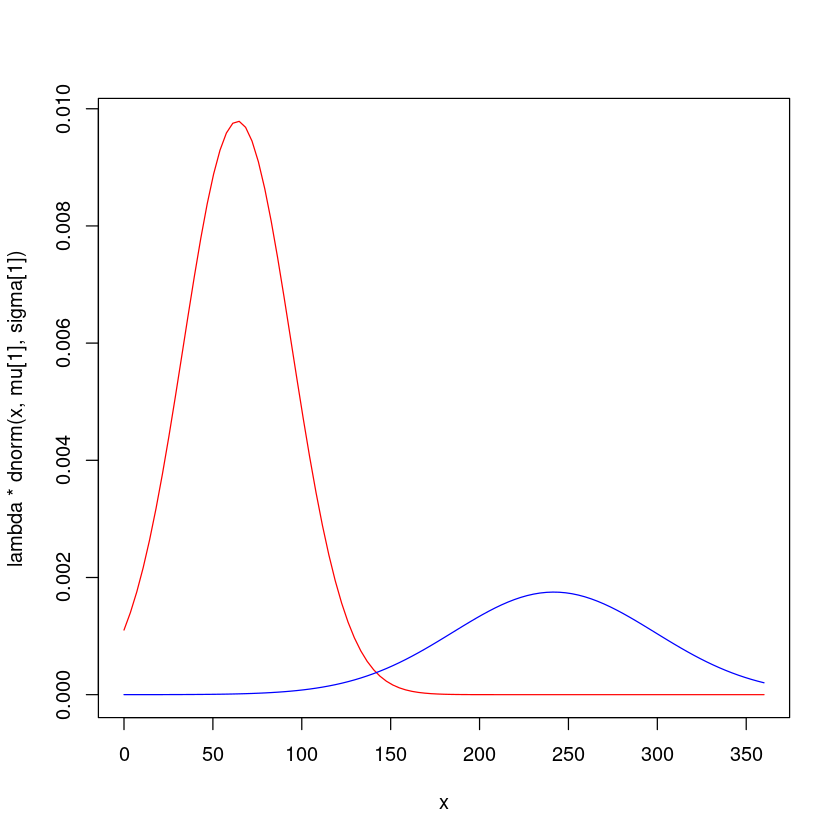

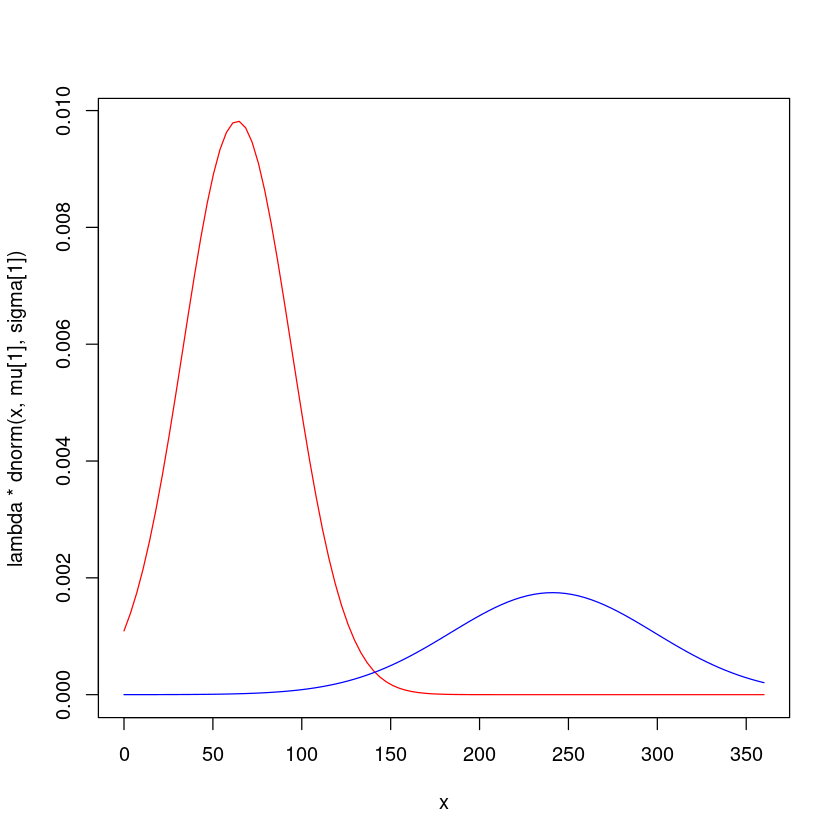

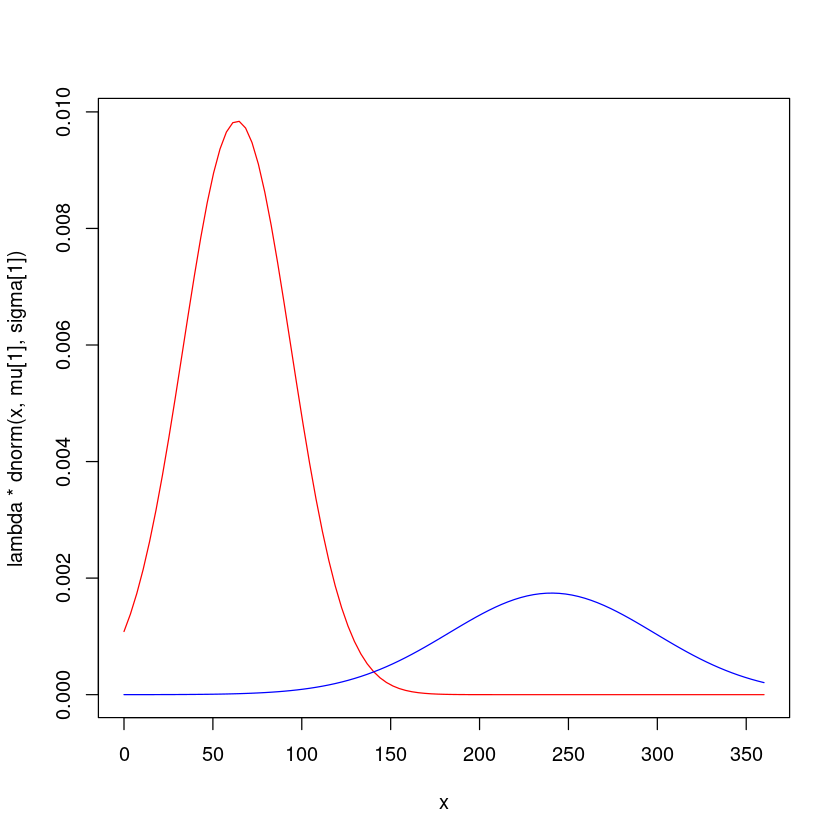

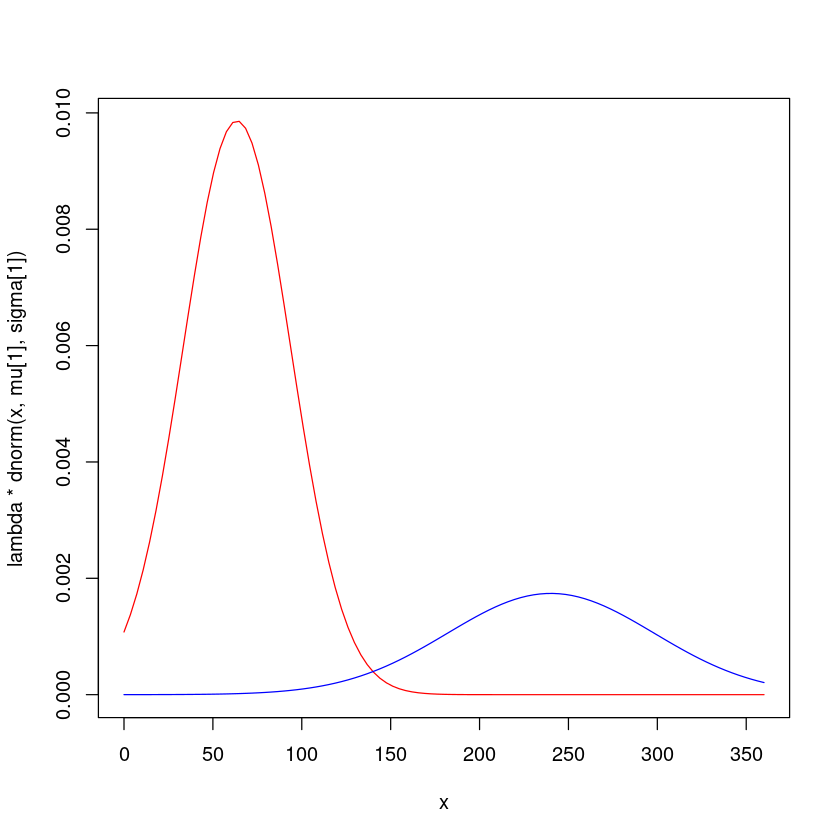

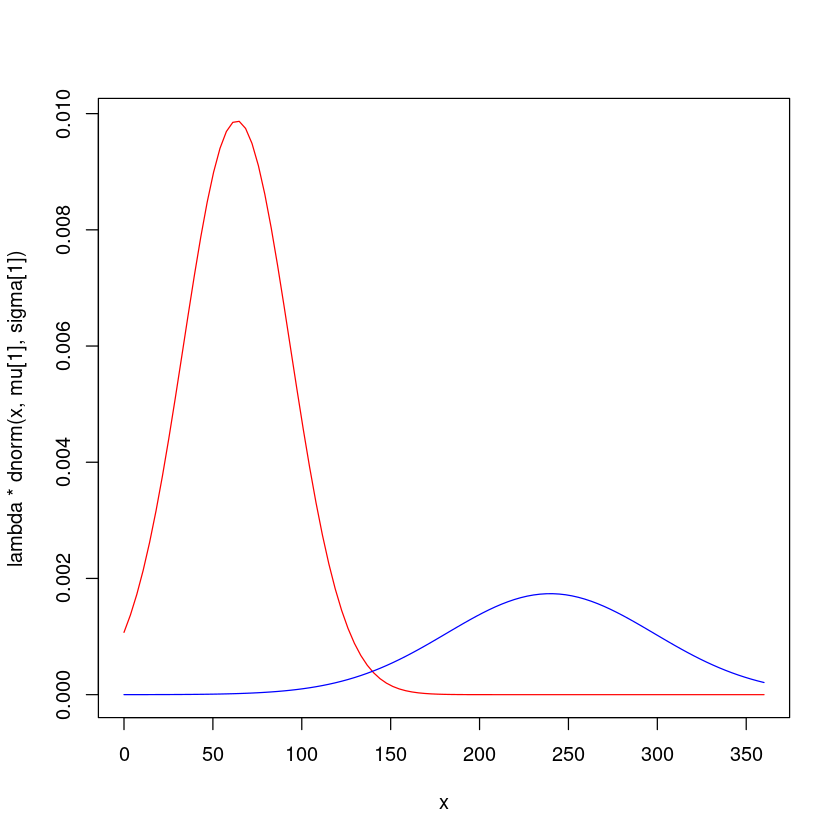

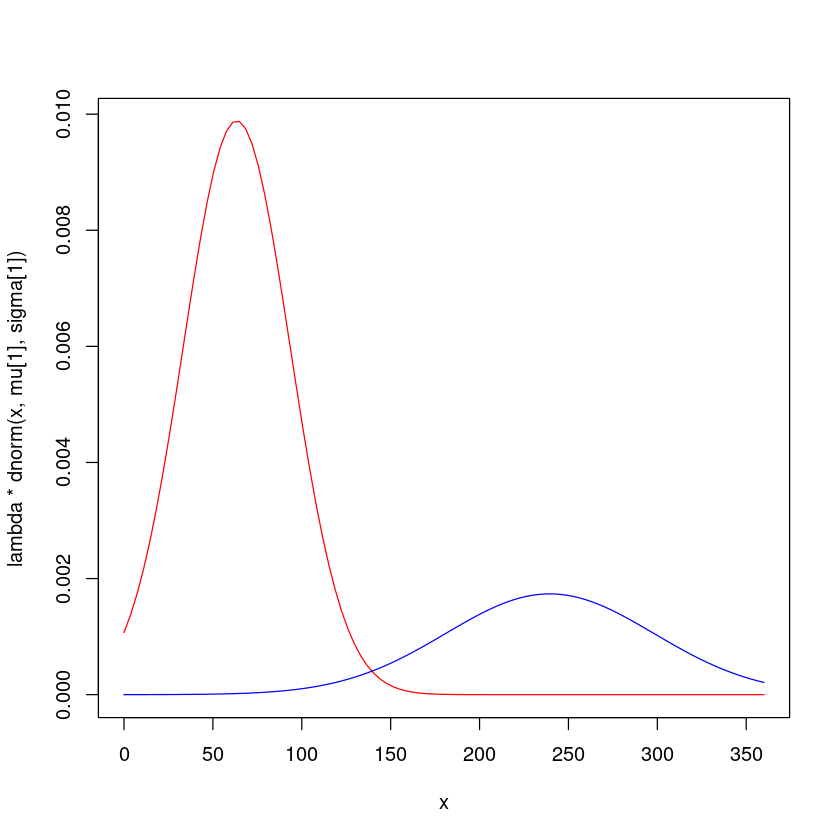

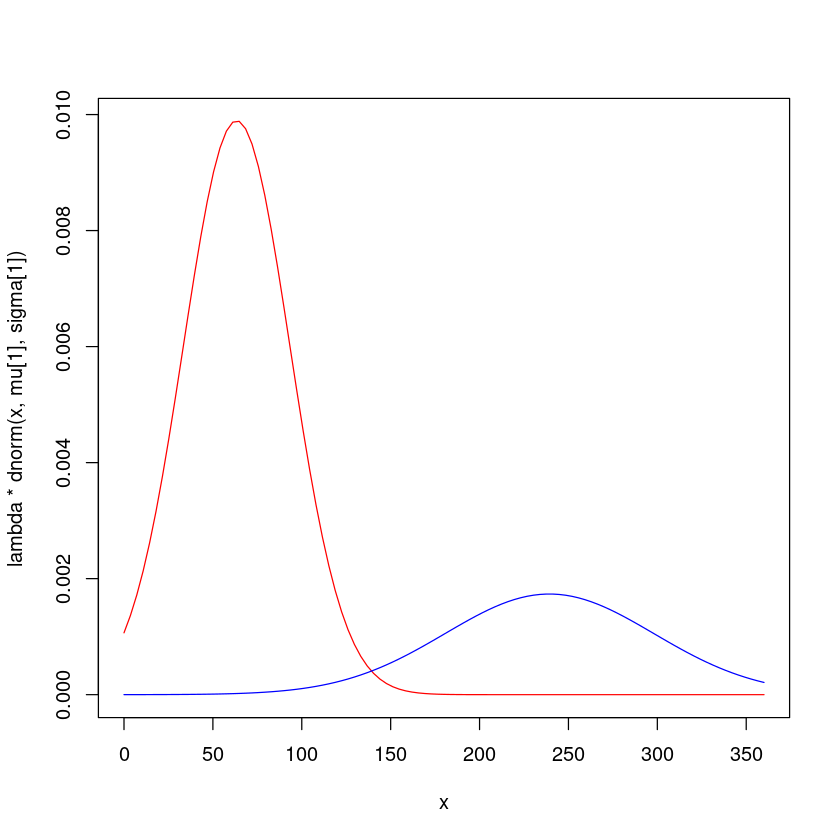

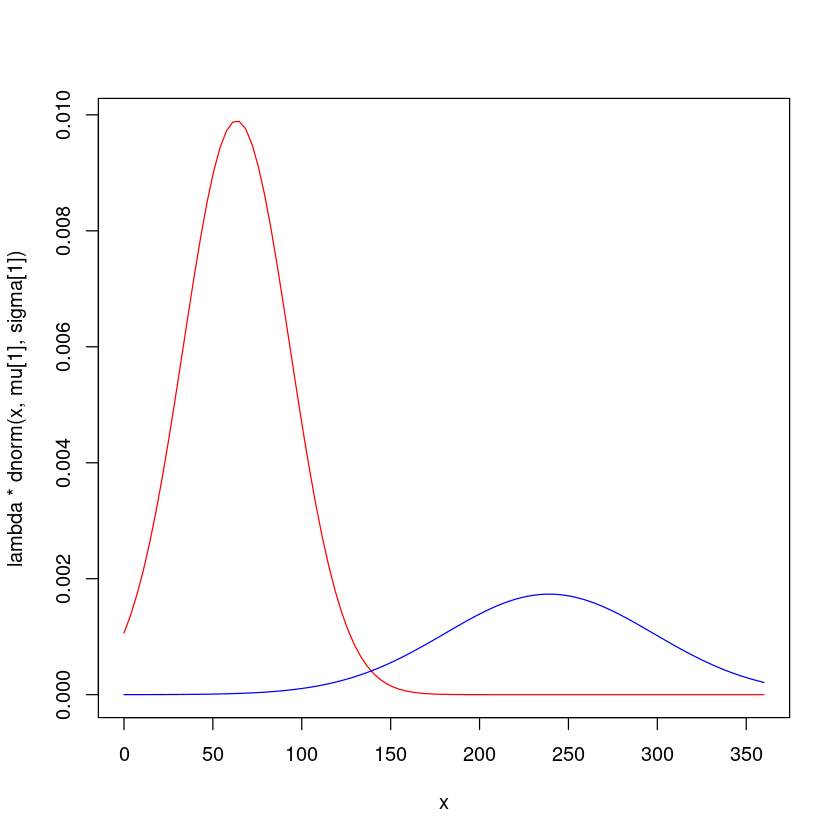

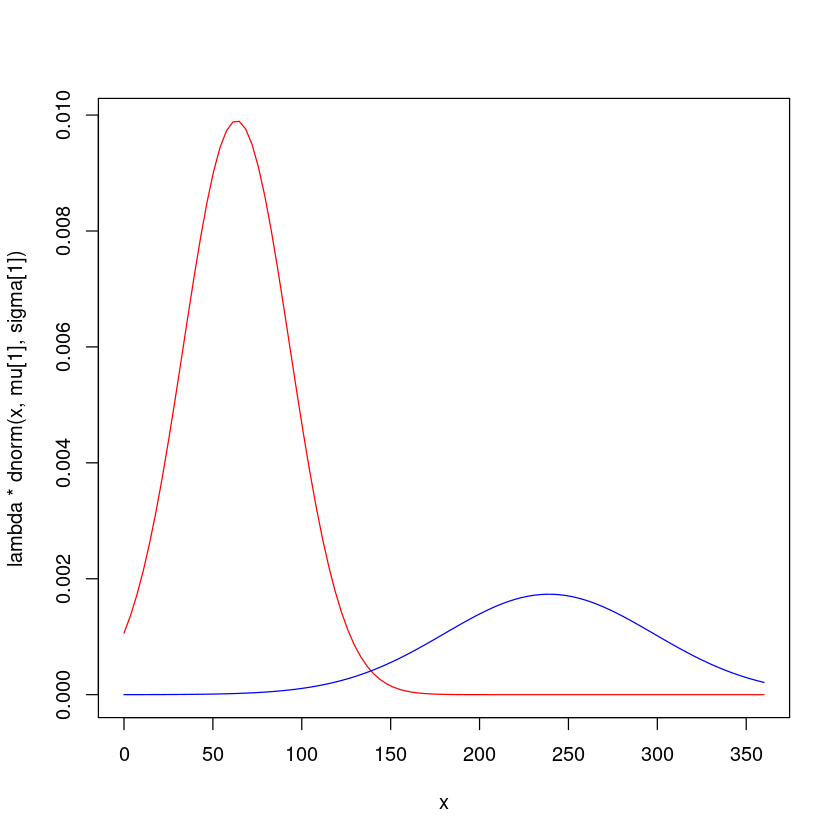

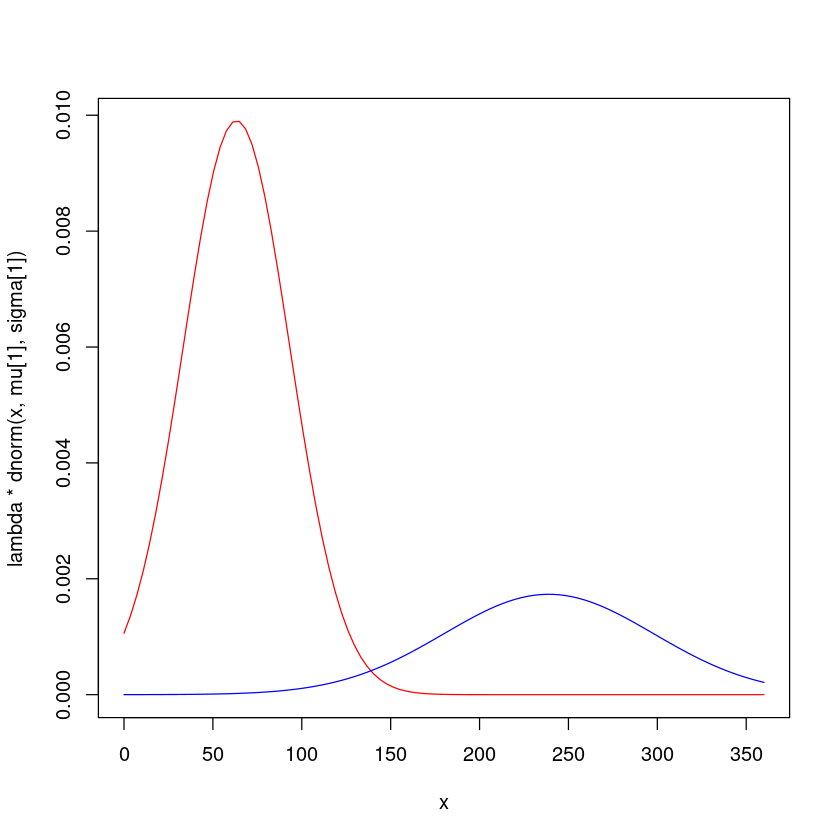

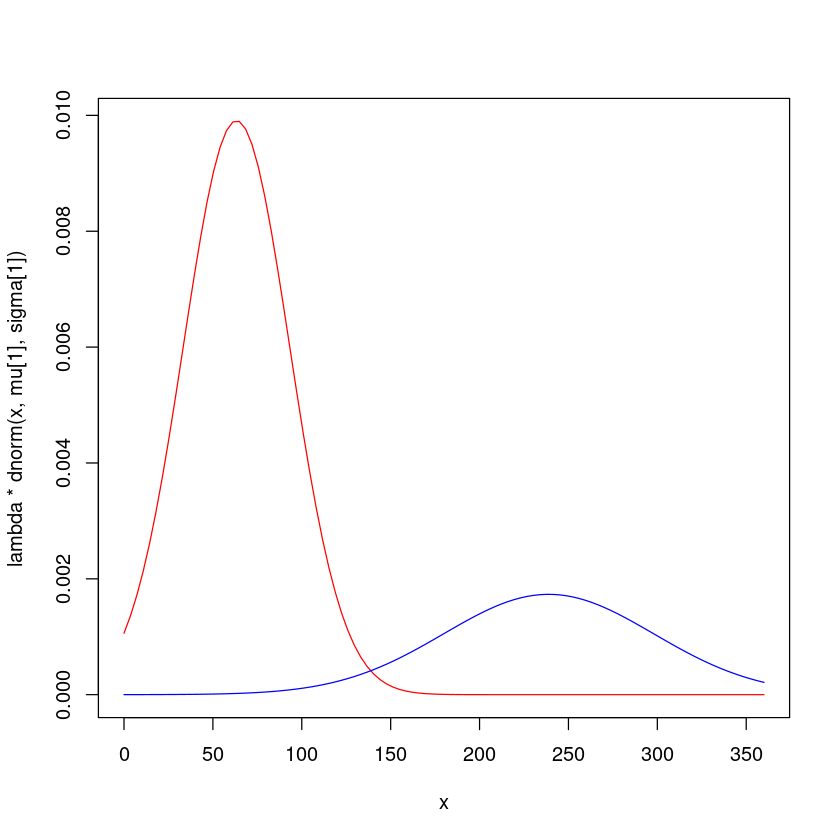

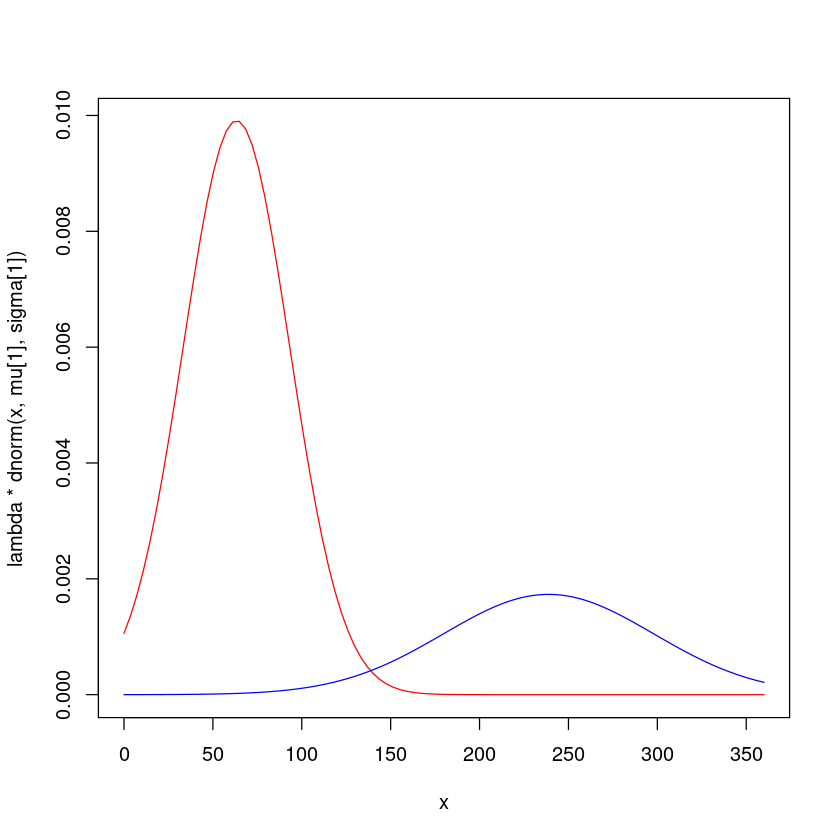

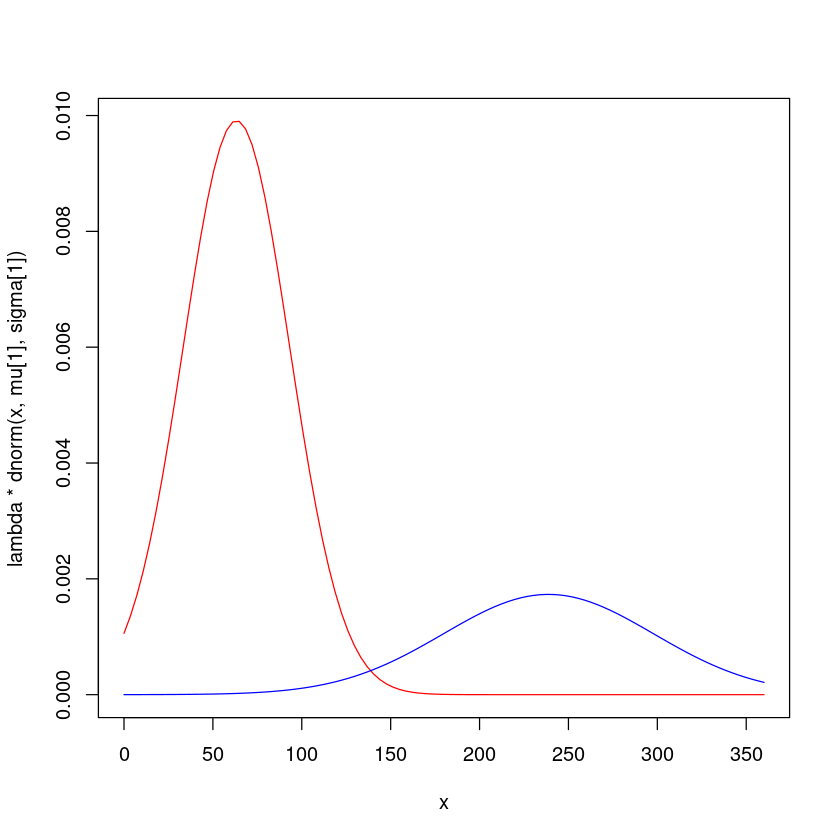

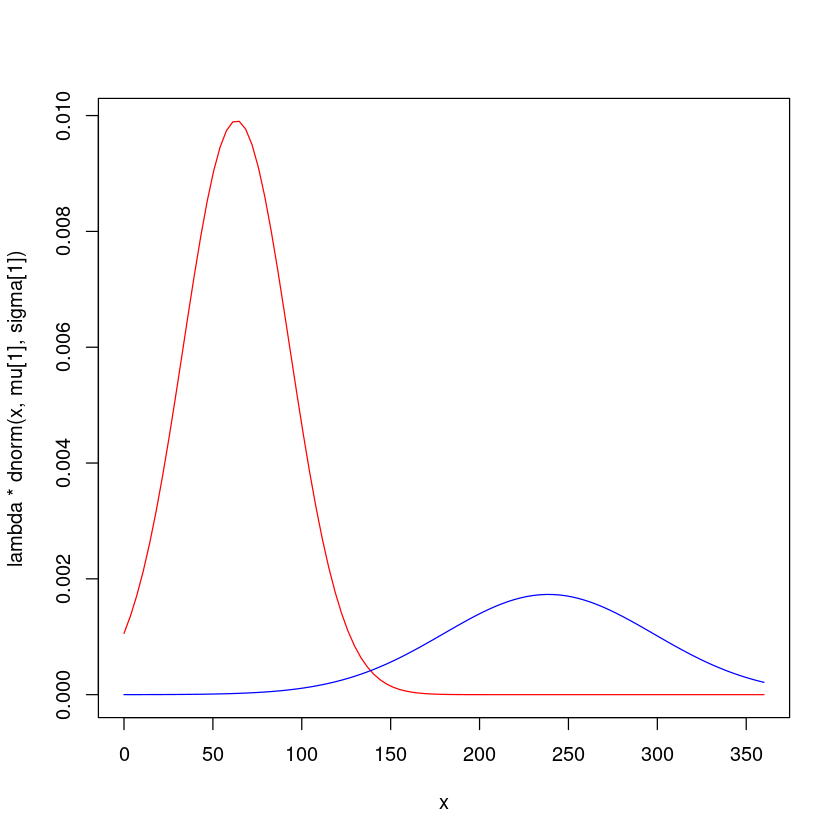

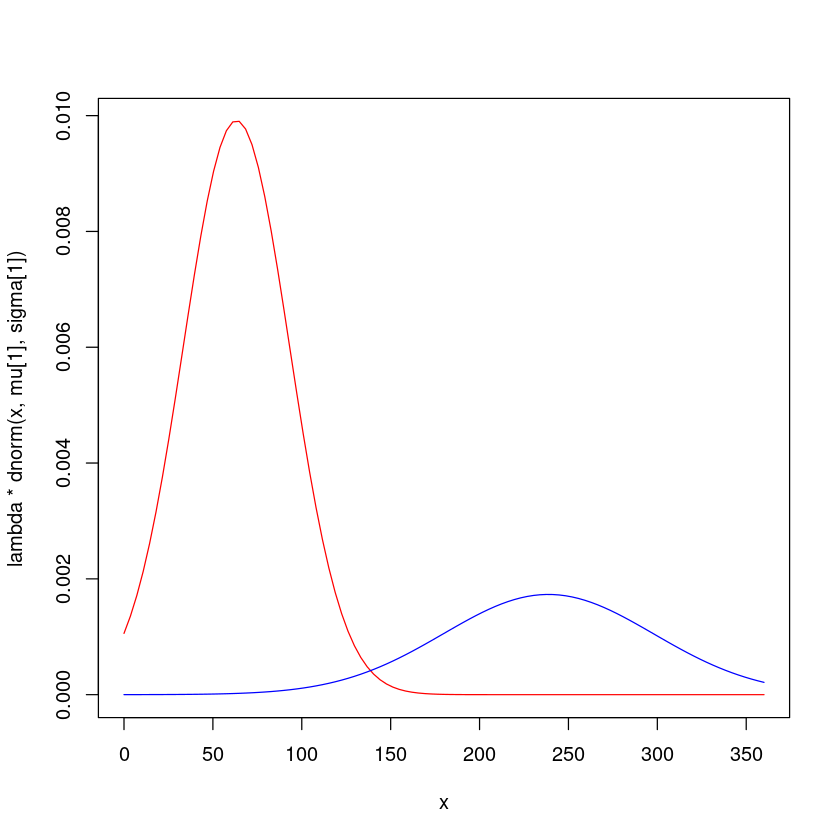

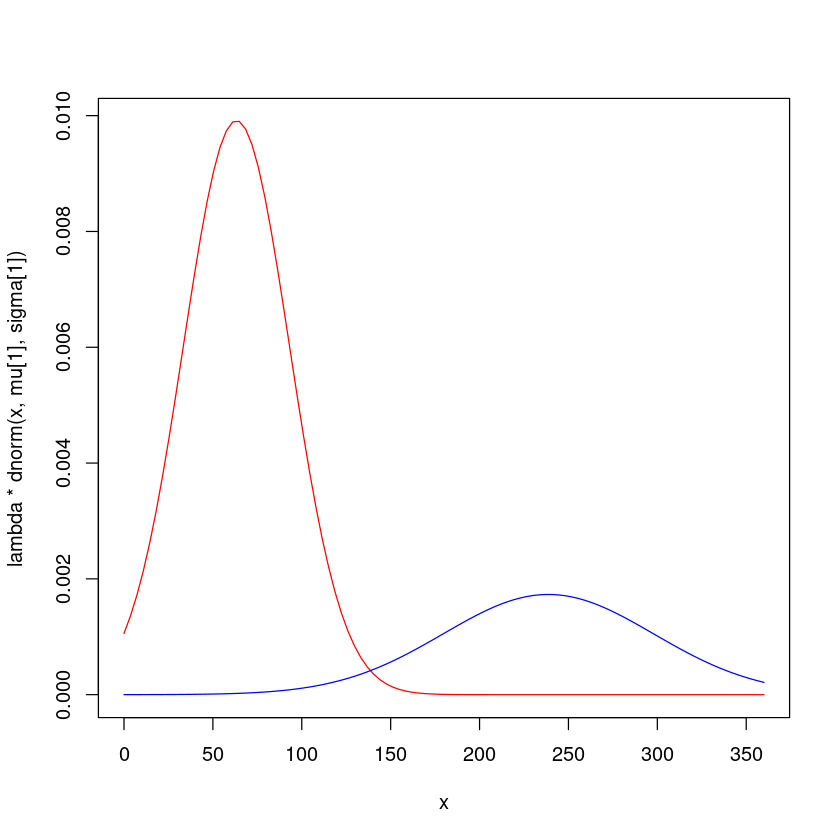

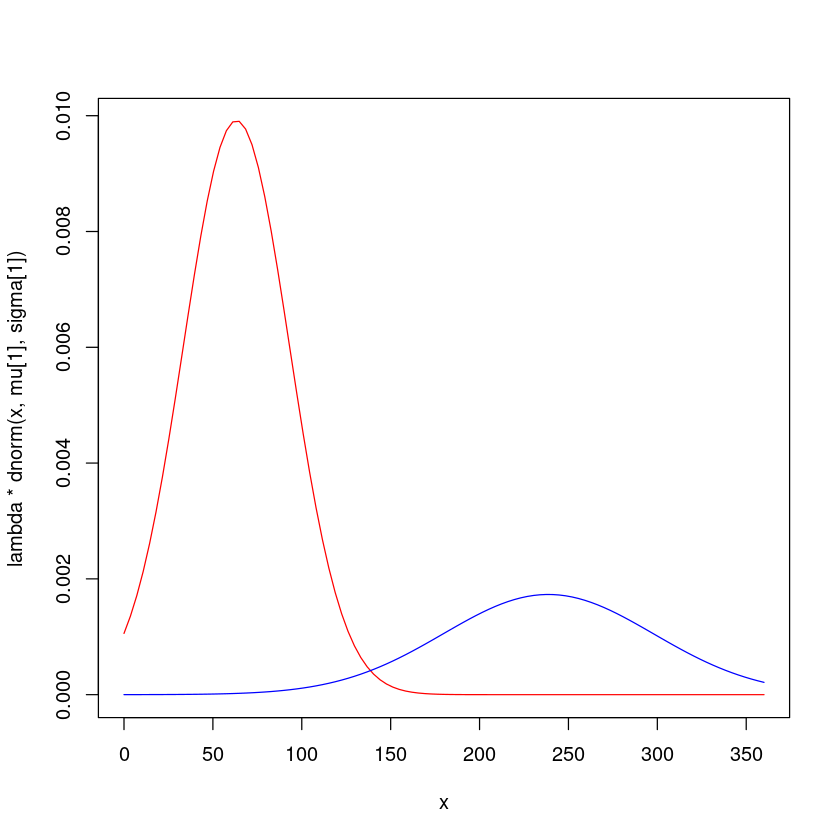

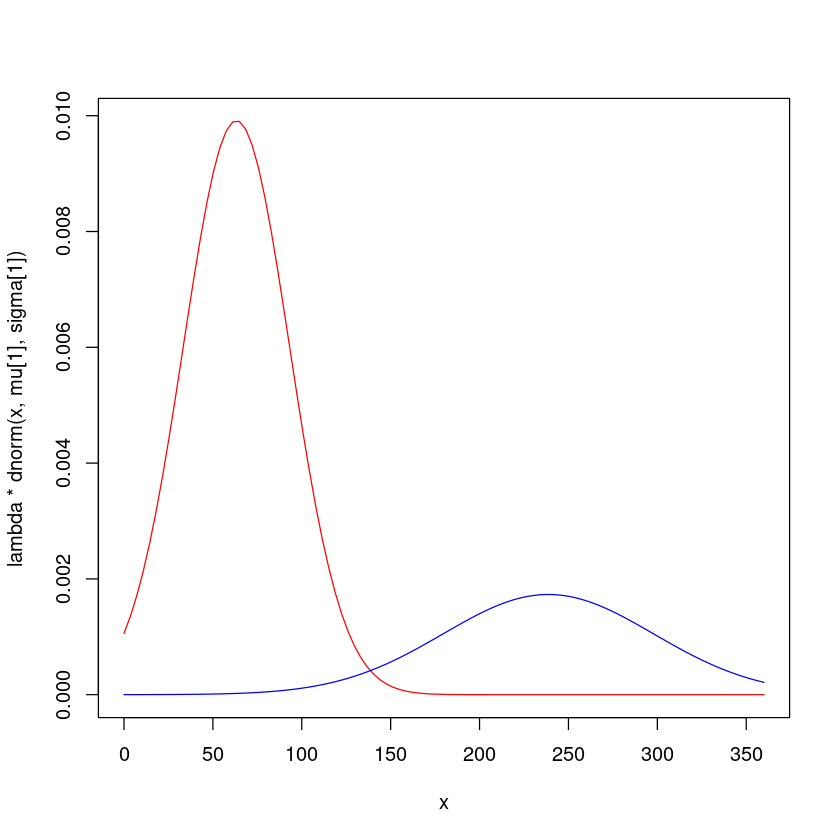

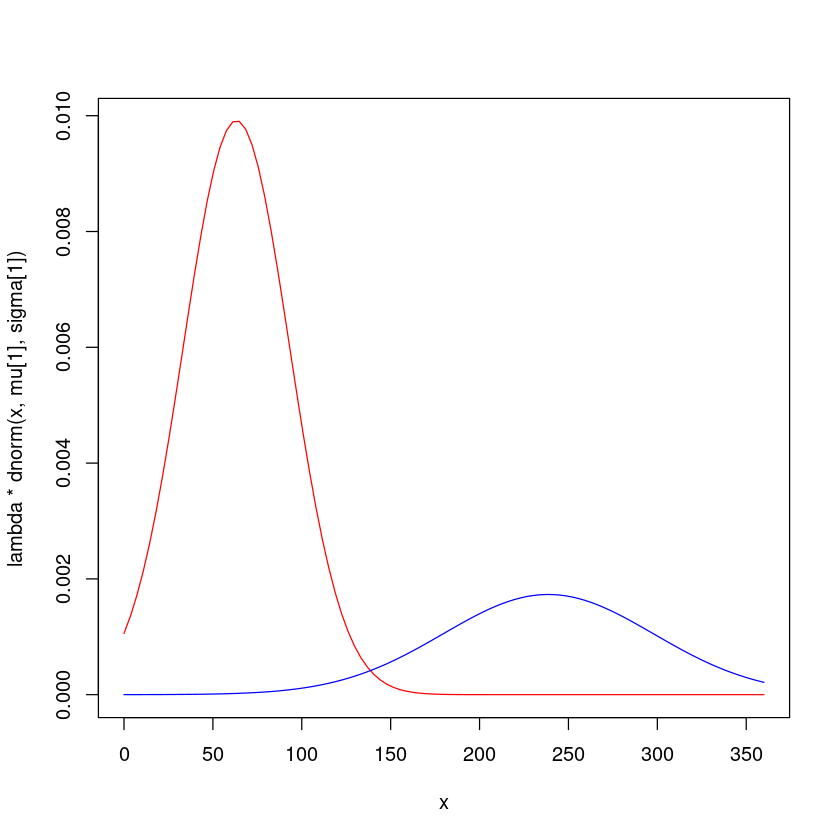

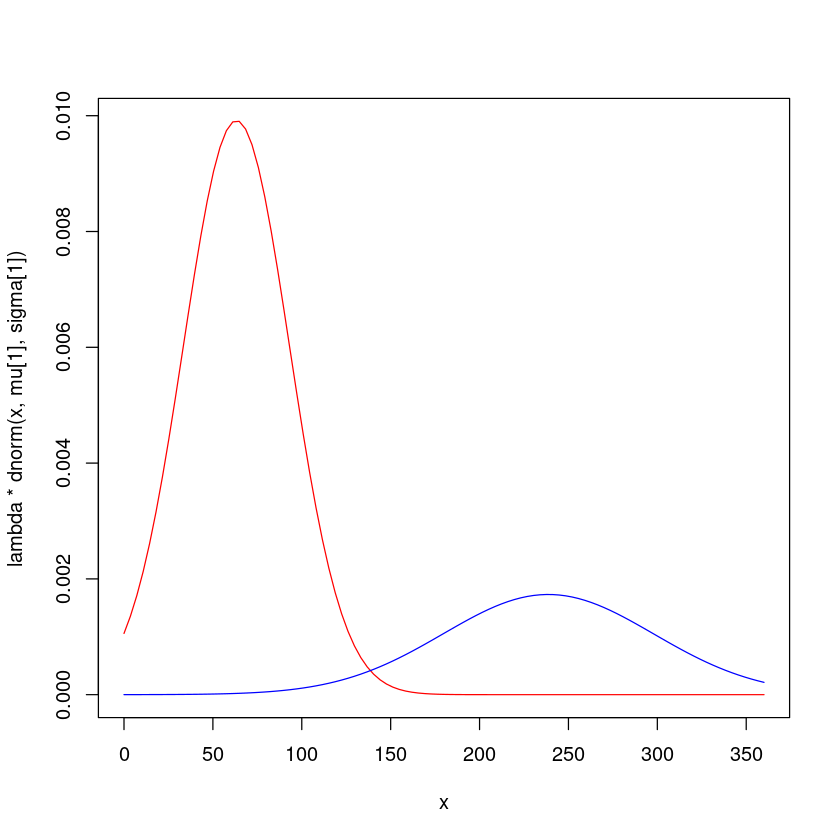

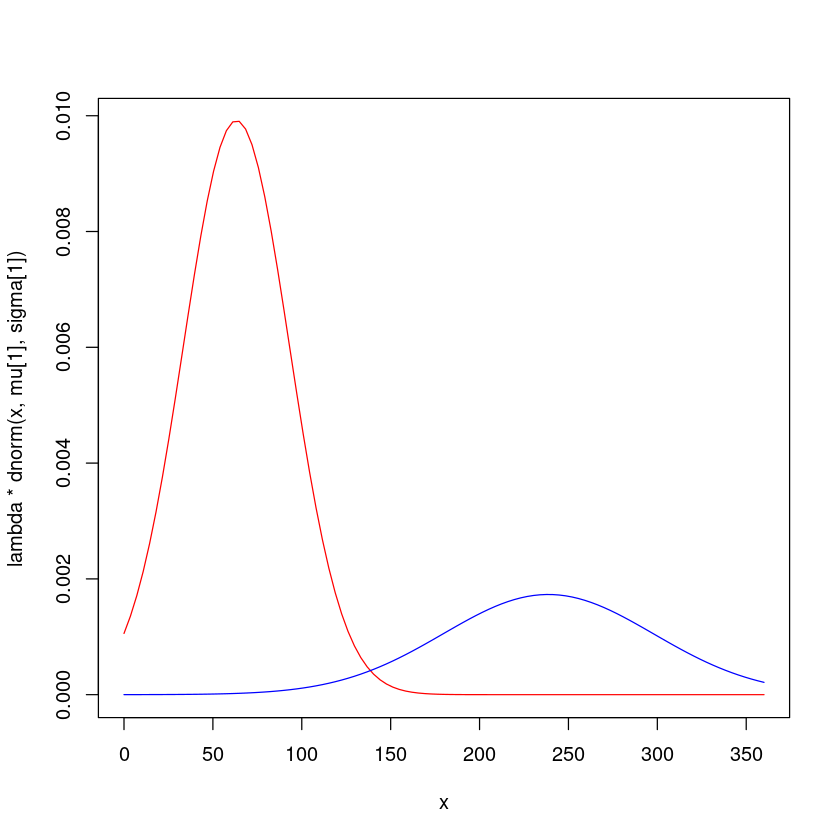

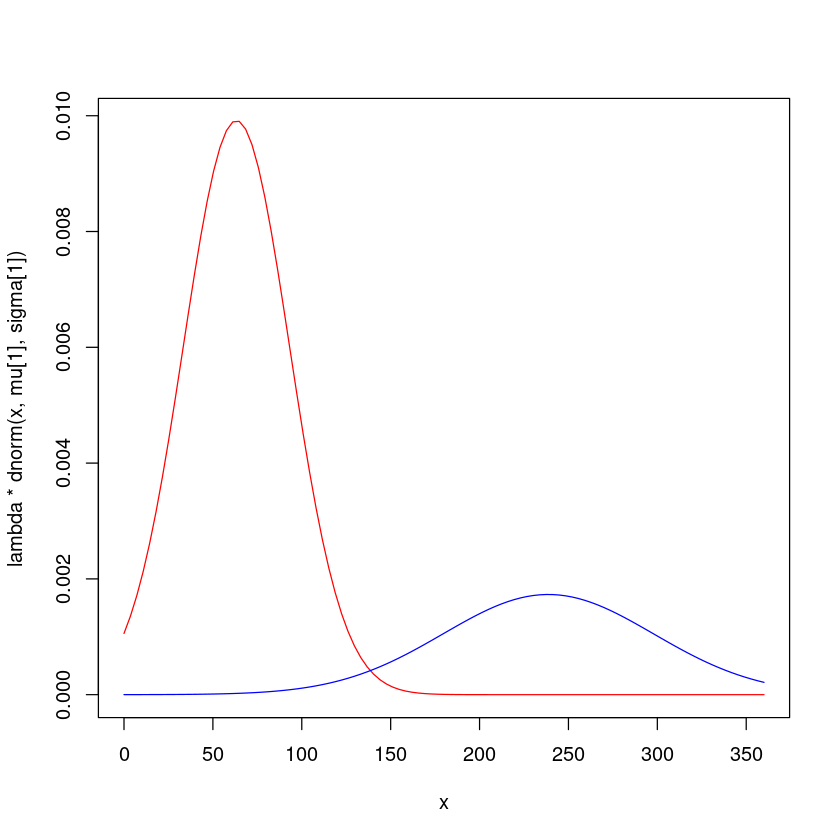

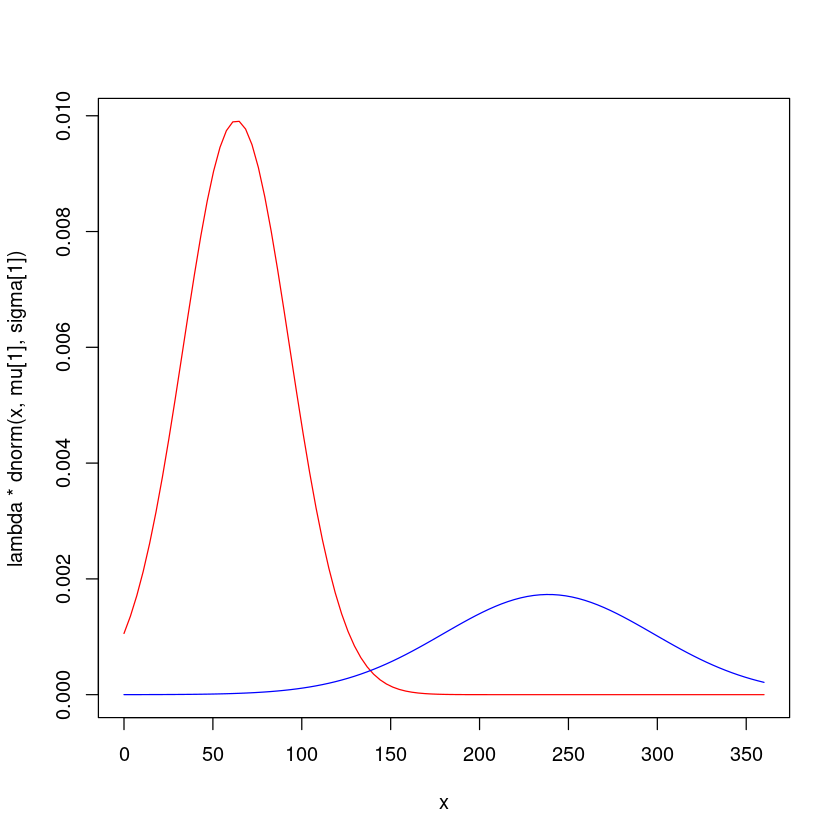

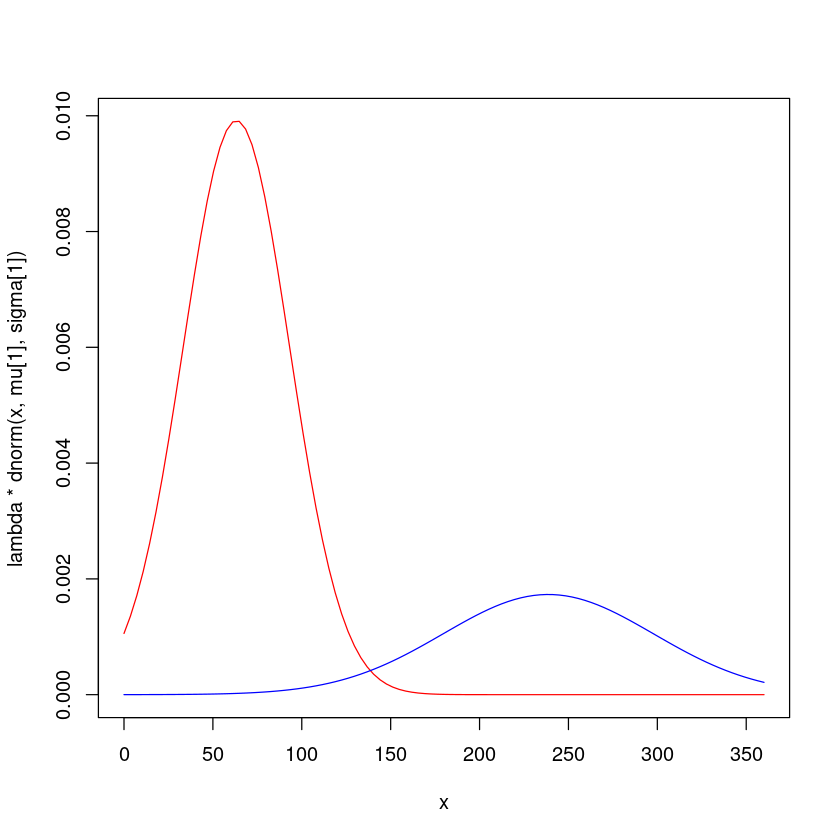

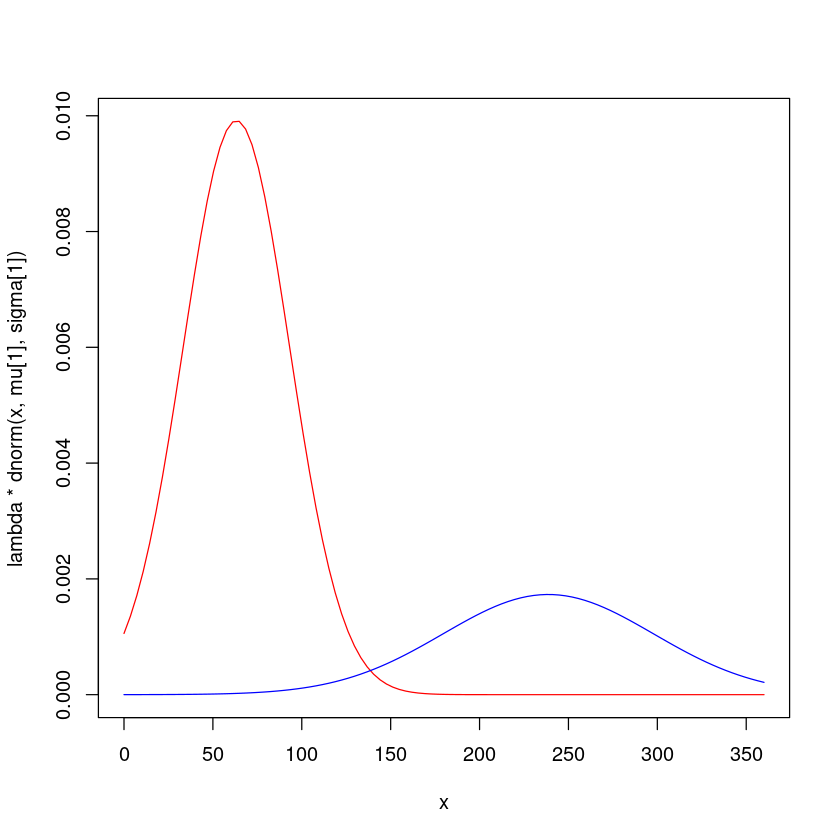

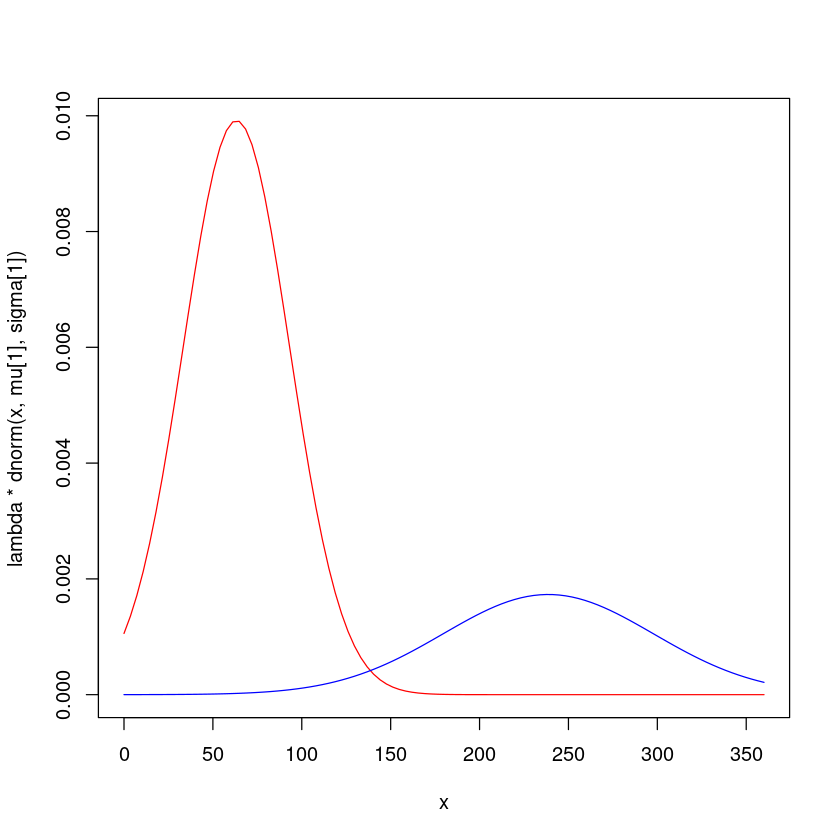

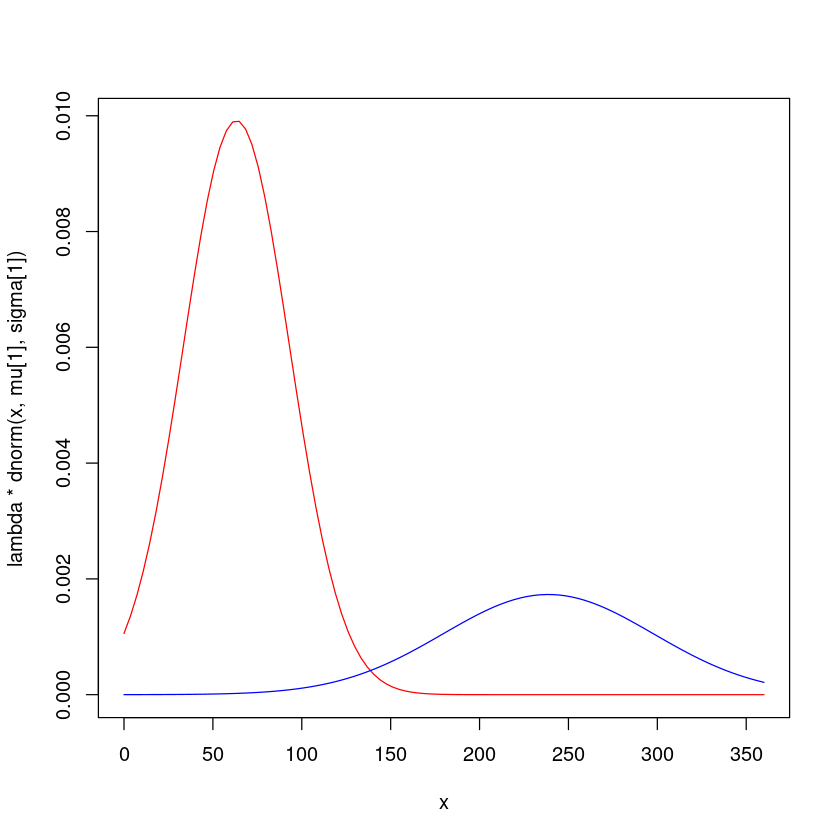

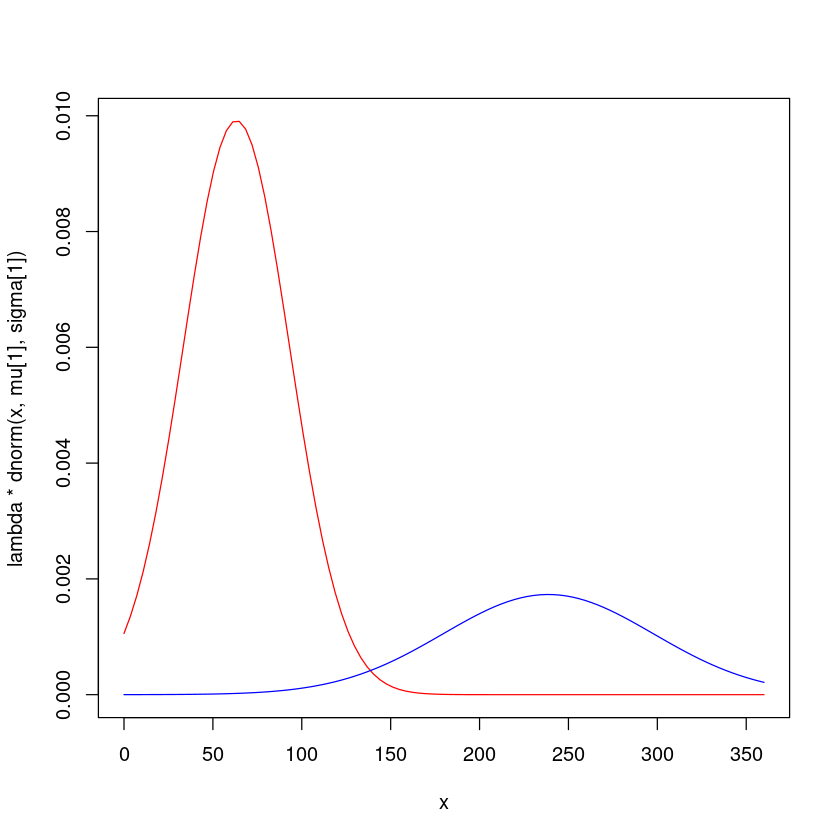

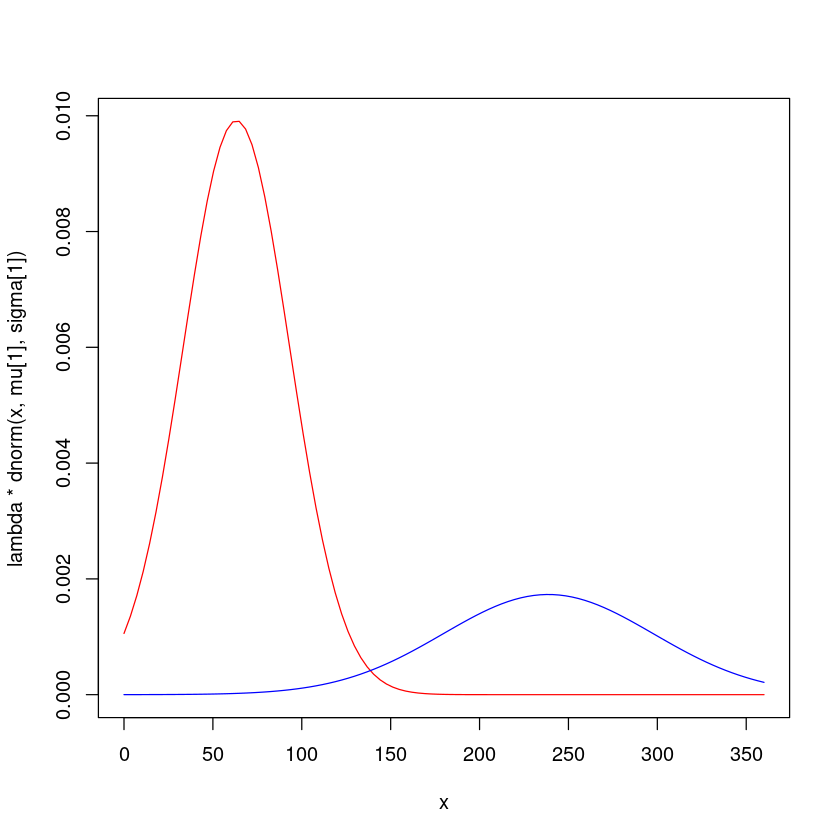

In [86]:
fit = twofix(turtles$Direction)

In [90]:
fit

$lambda
[1] 0.7429515

$mu
[1]  63.23454 238.66604

$sigma
[1] 29.88692 59.26468

$iteration
[1] 39

3. Compare the results above to the soultion given by `normalmixEM` in the `mixtools` library.


In [25]:
require(mixtools)

Loading required package: mixtools

mixtools package, version 2.0.0.1, Released 2022-12-04
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772 and the Chan Zuckerberg Initiative: Essential Open Source Software for Science (Grant No. 2020-255193).




In [32]:
m.turtle = normalmixEM(turtles$Direction, k = 3)

number of iterations= 253 


In [33]:
summary(m.turtle)

summary of normalmixEM object:
          comp 1      comp 2    comp 3
lambda  0.749041   0.0386187   0.21234
mu     63.411557 153.6590223 258.53308
sigma  29.684929   0.9400714  43.54213
loglik at estimate:  -411.8261 


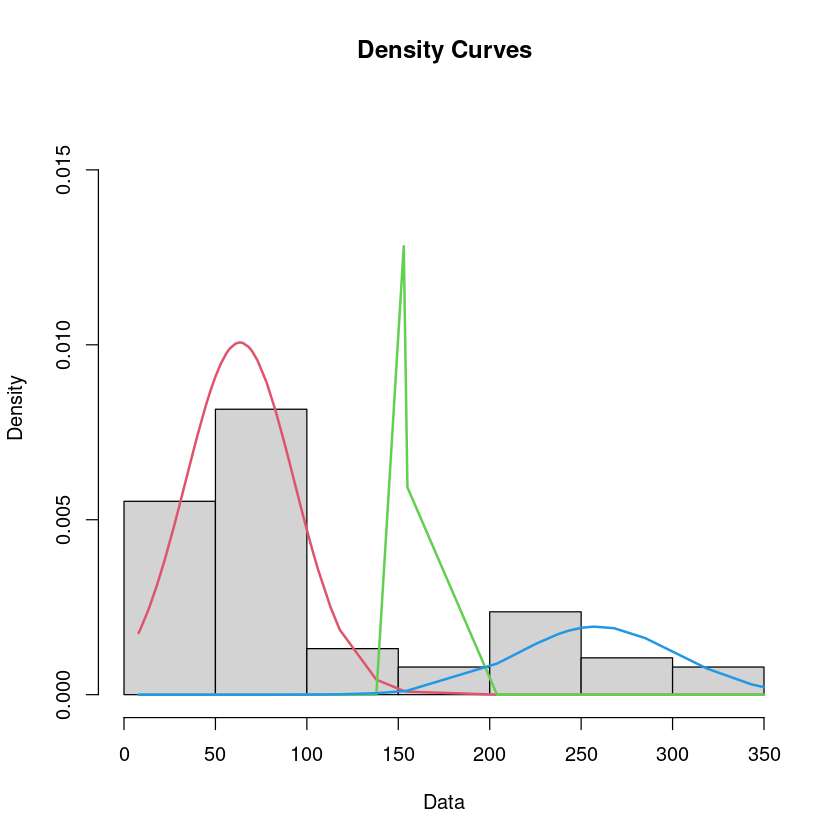

In [34]:
plot(m.turtle, whichplots = 2)


## Three Mix

4. Using the `ThreeMix.csv` data set, fit a two, three and four component mixtures. Compute the AIC and BIC.

In [92]:
# AIC, BIC
# AIC = -2 * loglikelihoodfunction + 2 * number_of_parameters
# BIC = -2 * loglikelihoodfunction + log(n) * number_of_parameters

In [35]:
threeMix = read.csv("ThreeMix.csv")

In [44]:
data = threeMix$x

In [57]:
m2 = normalmixEM(data, k = 2)
m3 = normalmixEM(data, k = 3)
m4 = normalmixEM(data, k = 4)

number of iterations= 12 
number of iterations= 51 
number of iterations= 655 


In [65]:
# BIC
n = length(data)
bic = -2 * m2$loglik + log(n) * 5 

In [58]:
# AIC
aic1 = -2 * m2$loglik + 2 * 5 # k = 2
aic2 = -2 * m3$loglik + 2 * 8 # k = 3
aic3 = -2 * m4$loglik + 2 * 11 # k = 4
# k = 4: lambda1, lambda2, lambda3, mu1, mu2, mu3, sigma1, sigma2, sigma3, mu4, sigma4

In [62]:
aic1

[1] 5832.113

In [63]:
aic2 # Here, AIC2 is the smallest one, that means, the optimal number of component is two! 

[1] 5692.394

In [61]:
aic3

[1] 5697.166

## Precipitation
5. The dataset `precip` (built in to R)  shows the rainfall in 70 US cities. Find a two-component Normal mixture model for the data.


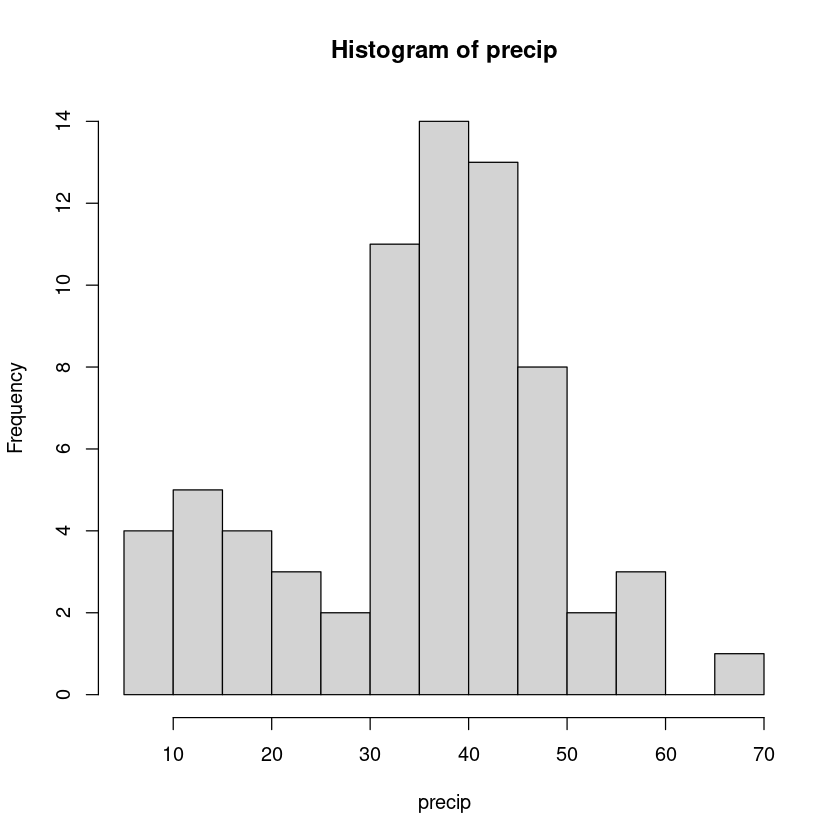

In [103]:
hist(precip, breaks=10)

In [67]:
EMprecip = normalmixEM(precip, k=2)

number of iterations= 32 


In [68]:
summary(EMprecip)

summary of normalmixEM object:
          comp 1    comp 2
lambda  0.180632  0.819368
mu     12.770171 39.761159
sigma   4.085301  9.525843
loglik at estimate:  -275.4721 


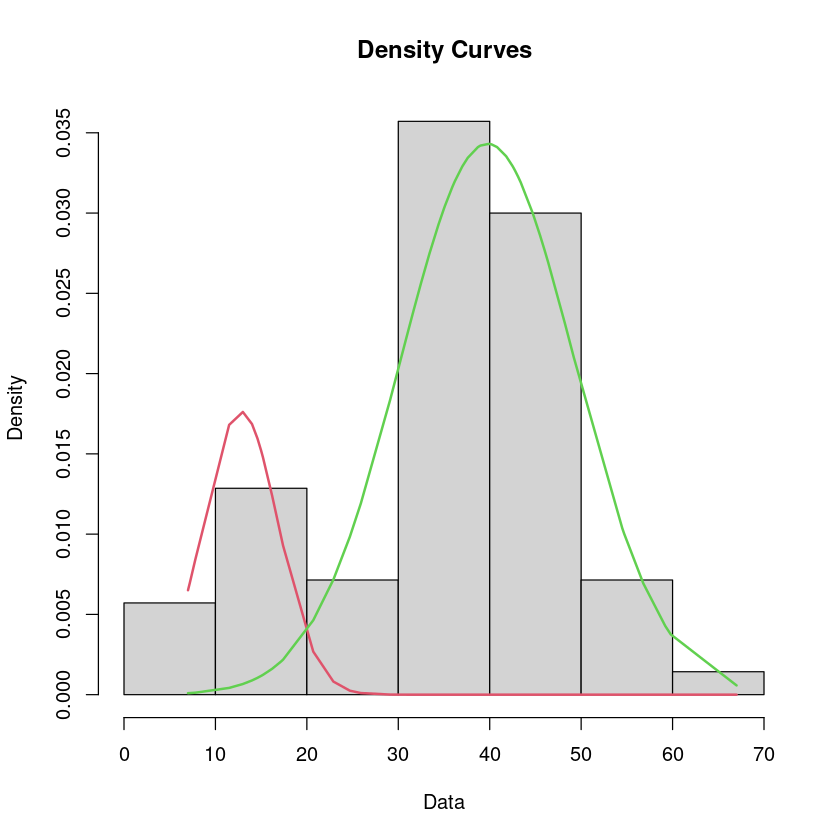

In [69]:
plot(EMprecip, whichplots = 2)

6. Using AIC and BIC, decide whether a one, two or three component model is the *best*.


In [70]:
# Loglikelihood function for single component, k = 1
one_precip = sum(dnorm(precip, mean(precip), sd(precip), log = TRUE))
two_precip = normalmixEM(precip, k=2)
three_precip = normalmixEM(precip, k =3)
#Value of Loglikelihood function for two component mixture model
two = two_precip$loglik
three = three_precip$loglik

number of iterations= 47 
number of iterations= 155 


In [71]:
aic1 = -2 * one_precip + 2 * 2 # k = 1
aic2 = -2 * two + 2 * 5 # k = 2
aic3 = -2 * three + 2 * 8 # k = 3

In [72]:
aic1

[1] 568.1548

In [73]:
aic2

[1] 560.9441

In [74]:
aic3

[1] 562.9684

In [75]:
n = length(precip)

In [77]:
bic1 = -2 * one_precip + log(n) * 2 # k = 1
bic2 = -2 * two + log(n) * 5 # k = 2
bic3 = -2 * three + log(n) * 8 # k = 3

In [78]:
bic1

[1] 572.6517

In [79]:
bic2

[1] 572.1866

In [80]:
bic3

[1] 580.9564

In [ ]:
ll1 = sum(dnorm(precip, mean(precip), sd(precip), log=TRUE))
